<a href="https://colab.research.google.com/github/fachavz/TFM_Dengue_Prediction/blob/main/TFM_Fabio_Chavez_Dengue_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importación de paquetes
import pandas as pd
import numpy as np
import time
import itertools
import seaborn as sns
from numpy import corrcoef, transpose, arange
from pylab import pcolor, show, colorbar, xticks, yticks
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
pd.options.mode.chained_assignment = None

In [ ]:
import io
from google.colab import files
#Creación de función para importar archivos .csv
def upload_files (index_fields=None):
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')), index_col = [0,1,2])
    return df

#Creación de función para exportar archivo con predicciones .csv
def download_predictions(test, pred_total_cases):
  file_name = "practica2_pred_" + time.strftime("%Y") + time.strftime("%m") + time.strftime("%d") + time.strftime("%H") + time.strftime("%M") + time.strftime("%S") + ".csv"
  predictions = pd.DataFrame({ 'city': test['city'], 'year': test['year'], 'weekofyear': test['weekofyear'], 'total_cases': pred_total_cases})
  with open(file_name, 'w') as f:
    predictions.to_csv(f, index = False)
  files.download(file_name)
  print("Downloaded " + file_name)

In [ ]:
#Subir el conjunto de entrenamiento sin variable objetivo (dengue_features_train.csv)
train_feat = upload_files()
print(train_feat.shape)
print(train_feat.dtypes)
train_feat.head()

Saving 1 dengue_features_train.csv to 1 dengue_features_train.csv
User uploaded file "1 dengue_features_train.csv" with length 287139 bytes
(1456, 21)
week_start_date                           object
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_tem

week_start_date   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
city year weekofyear                                                           
sj   1990 18              1990-04-30  0.122600  0.103725  0.198483  0.177617   
          19              1990-05-07  0.169900  0.142175  0.162357  0.155486   
          20              1990-05-14  0.032250  0.172967  0.157200  0.170843   
          21              1990-05-21  0.128633  0.245067  0.227557  0.235886   
          22              1990-05-28  0.196200  0.262200  0.251200  0.247340   

                      precipitation_amt_mm  reanalysis_air_temp_k  \
city year weekofyear                                                
sj   1990 18                         12.42             297.572857   
          19                         22.82             298.211429   
          20                         34.54             298.781429   
          21                         15.36             298.987143   
          22                          7.52             299.518571   

                      reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
city year weekofyear                                                       
sj   1990 18                     297.742857                   292.414286   
          19                     298.442857                   293.951429   
          20                     298.878571                   295.434286   
          21                     299.228571                   295.310000   
          22                     299.664286                   295.821429   

                      reanalysis_max_air_temp_k  ...  \
city year weekofyear                             ...   
sj   1990 18                              299.8  ...   
          19                              300.9  ...   
          20                              300.5  ...   
          21                              301.4  ...   
          22                              301.9  ...   

                      reanalysis_precip_amt_kg_per_m2  \
city year weekofyear                                    
sj   1990 18                                    32.00   
          19                                    17.94   
          20                                    26.10   
          21                                    13.90   
          22                                    12.20   

                      reanalysis_relative_humidity_percent  \
city year weekofyear                                         
sj   1990 18                                     73.365714   
          19                                     77.368571   
          20                                     82.052857   
          21                                     80.337143   
          22                                     80.460000   

                      reanalysis_sat_precip_amt_mm  \
city year weekofyear                                 
sj   1990 18                                 12.42   
          19                                 22.82   
          20                                 34.54   
          21                                 15.36   
          22                                  7.52   

                      reanalysis_specific_humidity_g_per_kg  \
city year weekofyear                                          
sj   1990 18                                      14.012857   
          19                                      15.372857   
          20                                      16.848571   
          21                                      16.672857   
          22                                      17.210000   

                      reanalysis_tdtr_k  station_avg_temp_c  \
city year weekofyear                                          
sj   1990 18                   2.628571           25.442857   
          19                   2.371429           26.714286   
          20                   2.300000           26.714286   
          21                   2.428571           27.471429   
          22    

In [ ]:
#Subir la variable objetivo total_cases del conjunto de entrenamiento (dengue_labels_train.csv)
train_labels = upload_files()

#Unificar el conjunto de entrenamiento (características + variable objetivo)
train = pd.merge(train_feat,train_labels,on=['city', 'year', 'weekofyear'])
print(train.shape)
train.head()

Saving 2 dengue_labels_train.csv to 2 dengue_labels_train.csv
User uploaded file "2 dengue_labels_train.csv" with length 19582 bytes
(1456, 22)


week_start_date   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
city year weekofyear                                                           
sj   1990 18              1990-04-30  0.122600  0.103725  0.198483  0.177617   
          19              1990-05-07  0.169900  0.142175  0.162357  0.155486   
          20              1990-05-14  0.032250  0.172967  0.157200  0.170843   
          21              1990-05-21  0.128633  0.245067  0.227557  0.235886   
          22              1990-05-28  0.196200  0.262200  0.251200  0.247340   

                      precipitation_amt_mm  reanalysis_air_temp_k  \
city year weekofyear                                                
sj   1990 18                         12.42             297.572857   
          19                         22.82             298.211429   
          20                         34.54             298.781429   
          21                         15.36             298.987143   
          22                          7.52             299.518571   

                      reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
city year weekofyear                                                       
sj   1990 18                     297.742857                   292.414286   
          19                     298.442857                   293.951429   
          20                     298.878571                   295.434286   
          21                     299.228571                   295.310000   
          22                     299.664286                   295.821429   

                      reanalysis_max_air_temp_k  ...  \
city year weekofyear                             ...   
sj   1990 18                              299.8  ...   
          19                              300.9  ...   
          20                              300.5  ...   
          21                              301.4  ...   
          22                              301.9  ...   

                      reanalysis_relative_humidity_percent  \
city year weekofyear                                         
sj   1990 18                                     73.365714   
          19                                     77.368571   
          20                                     82.052857   
          21                                     80.337143   
          22                                     80.460000   

                      reanalysis_sat_precip_amt_mm  \
city year weekofyear                                 
sj   1990 18                                 12.42   
          19                                 22.82   
          20                                 34.54   
          21                                 15.36   
          22                                  7.52   

                      reanalysis_specific_humidity_g_per_kg  \
city year weekofyear                                          
sj   1990 18                                      14.012857   
          19                                      15.372857   
          20                                      16.848571   
          21                                      16.672857   
          22                                      17.210000   

                      reanalysis_tdtr_k  station_avg_temp_c  \
city year weekofyear                                          
sj   1990 18                   2.628571           25.442857   
          19                   2.371429           26.714286   
          20                   2.300000           26.714286   
          21                   2.428571           27.471429   
          22                   3.014286           28.942857   

                      station_diur_temp_rng_c  station_max_temp_c  \
city year weekofyear                                                
sj   1990 18                         6.900000                29.4   
          19                         6.371429                31.7   
          20                         6.485714                32.2   
       

In [ ]:
#Subir el conjunto de test sin variable objetivo (dengue_features_test.csv)
test = upload_files()
print(test.shape)
test.head()

Saving 3 dengue_features_test.csv to 3 dengue_features_test.csv
User uploaded file "3 dengue_features_test.csv" with length 82465 bytes
(416, 21)


week_start_date  ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
city year weekofyear                                                          
sj   2008 18              2008-04-29  -0.0189 -0.018900  0.102729  0.091200   
          19              2008-05-06  -0.0180 -0.012400  0.082043  0.072314   
          20              2008-05-13  -0.0015       NaN  0.151083  0.091529   
          21              2008-05-20      NaN -0.019867  0.124329  0.125686   
          22              2008-05-27   0.0568  0.039833  0.062267  0.075914   

                      precipitation_amt_mm  reanalysis_air_temp_k  \
city year weekofyear                                                
sj   2008 18                         78.60             298.492857   
          19                         12.56             298.475714   
          20                          3.66             299.455714   
          21                          0.00             299.690000   
          22                          0.76             299.780000   

                      reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
city year weekofyear                                                       
sj   2008 18                     298.550000                   294.527143   
          19                     298.557143                   294.395714   
          20                     299.357143                   295.308571   
          21                     299.728571                   294.402857   
          22                     299.671429                   294.760000   

                      reanalysis_max_air_temp_k  ...  \
city year weekofyear                             ...   
sj   2008 18                              301.1  ...   
          19                              300.8  ...   
          20                              302.2  ...   
          21                              303.0  ...   
          22                              302.3  ...   

                      reanalysis_precip_amt_kg_per_m2  \
city year weekofyear                                    
sj   2008 18                                    25.37   
          19                                    21.83   
          20                                     4.12   
          21                                     2.20   
          22                                     4.36   

                      reanalysis_relative_humidity_percent  \
city year weekofyear                                         
sj   2008 18                                     78.781429   
          19                                     78.230000   
          20                                     78.270000   
          21                                     73.015714   
          22                                     74.084286   

                      reanalysis_sat_precip_amt_mm  \
city year weekofyear                                 
sj   2008 18                                 78.60   
          19                                 12.56   
          20                                  3.66   
          21                                  0.00   
          22                                  0.76   

                      reanalysis_specific_humidity_g_per_kg  \
city year weekofyear                                          
sj   2008 18                                      15.918571   
          19                                      15.791429   
          20                                      16.674286   
          21                                      15.775714   
          22                                      16.137143   

                      reanalysis_tdtr_k  station_avg_temp_c  \
city year weekofyear                                          
sj   2008 18                   3.128571           26.528571   
          19                   2.571429           26.071429   
          20                   4.428571           27.928571   
          21                   4.342857           28.057143   
          22           

In [ ]:
#Subir formato de submission para el modelo de San Juan (submission_format.csv)
submission_sj = upload_files()
submission_sj = submission_sj.reset_index()

Saving 4 submission_format - SJ.csv to 4 submission_format - SJ.csv
User uploaded file "4 submission_format - SJ.csv" with length 3629 bytes


In [ ]:
#Subir formato de submission para el modelo de Iquitos (submission_format.csv)
submission_iq = upload_files()
submission_iq = submission_iq.reset_index()

Saving 5 submission_format - IQ.csv to 5 submission_format - IQ.csv
User uploaded file "5 submission_format - IQ.csv" with length 2976 bytes


In [ ]:
#Se crea la columna date (concatenando el año y el número de semana)
train.reset_index(inplace=True)
train['date'] = train['year'].map(str)  + '-' + train['weekofyear'].map(str)
# Se definen las columnas city y date como el índice del df
train.set_index(['city','date'], inplace=True)
#Se eliminan las columnas "year" y "weekofyear" y las demás características ambientales no seleccionadas para San Juan.
train.drop(['year', 'weekofyear'], axis = 1, inplace = True)
train.head()

test.reset_index(inplace=True)
test['date'] = test['year'].map(str)  + '-' + test['weekofyear'].map(str)
test.set_index(['city','date'], inplace=True)
test.drop(['year', 'weekofyear'], axis = 1, inplace = True)


A partir del contexto del problema, se nos indica que la dinámica de transmisión del dengue está relacionada con las variables climáticas (tales como temperatura y precipitación). Dado que cada región de estudio tiene diferentes condiciones climáticas, se decidió dividir el conjunto de datos por ciudad. De esta forma, se creará un subconjunto para la ciudad de San Juan y otro subconjunto para la ciudad de Iquitos. Esto permitirá que las características de cada ciudad no distorsionen las conclusiones globales obtenidas.

In [ ]:
#División del conjunto de datos en las dos ciudades de estudio
#Separación de datos para San Juan
sj_train_initial = train.loc['sj']
sj_test_initial = test.loc['sj']
sj_train_initial.head()

#Separación de datos para Iquitos
iq_train_initial = train.loc['iq']
iq_test_initial = test.loc['iq']
iq_train_initial.head()

,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
date,,,,,,,,,,,,,,,,,,,,,
2000-26,2000-07-01,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,298.450000,295.184286,307.3,...,92.418571,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,3.0,0
2000-27,2000-07-08,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,298.428571,295.358571,306.6,...,93.581429,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,55.6,0
2000-28,2000-07-15,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,297.392857,295.622857,304.5,...,95.848571,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,38.1,0
2000-29,2000-07-22,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,296.228571,292.797143,303.6,...,87.234286,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0,0
2000-30,2000-07-29,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,297.635714,293.957143,307.0,...,88.161429,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1,4.0,0


---
#Selección de fuentes de datos - San Juan
---

A partir de la revisión de la información proporcionada sobre las fuentes de datos disponibles, se procedió a seleccionar para la ciudad de San Juan los datos de estaciones de superficie y satelitales. Se prescindió de los datos de reanálisis, a excepción de datos no disponibles en otras fuentes, como los valores de humedad y la temperatura de punto de rocío.

In [ ]:
sj_train_prep = sj_train_initial.copy()
sj_train_prep.drop(['reanalysis_air_temp_k', 'reanalysis_avg_temp_k', 'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2', 'reanalysis_sat_precip_amt_mm', 'reanalysis_tdtr_k', 'station_precip_mm'], axis = 1, inplace = True)

sj_test_prep = sj_test_initial.copy()
sj_test_prep.drop(['reanalysis_air_temp_k', 'reanalysis_avg_temp_k', 'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k', 'reanalysis_precip_amt_kg_per_m2', 'reanalysis_sat_precip_amt_mm', 'reanalysis_tdtr_k', 'station_precip_mm'], axis = 1, inplace = True)

---
#Selección de fuentes de datos - Iquitos
---

A partir de la revisión de la información proporcionada sobre las fuentes de datos disponibles, se procedió a seleccionar para la ciudad de Iquitos los datos de Reanálisis y satelitales. Se prescindió de los datos de estación y, en su lugar, se tomaron los datos de reanálisis (a excepción del dato de precipitación de estaciones) y satelitales. Los datos de estación para la ciudad de Iquitos presentan una baja completitud, y se recomendó remitirse a otras fuentes de información. De esta forma, las características ambientales a conservar para el conjunto de datos de Iquitos fueron:

In [ ]:
iq_train_prep = iq_train_initial.copy()
iq_train_prep.drop(['station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c', 'station_min_temp_c', 'reanalysis_precip_amt_kg_per_m2', 'reanalysis_sat_precip_amt_mm', 'station_precip_mm'], axis = 1, inplace = True)

iq_test_prep = iq_test_initial.copy()
iq_test_prep.drop(['station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c', 'station_min_temp_c', 'reanalysis_precip_amt_kg_per_m2', 'reanalysis_sat_precip_amt_mm', 'station_precip_mm'], axis = 1, inplace = True)

---
#Preprocesado - San Juan
---

Empleando el módulo pandas-profiling, se procedió a generar un reporte exploratorio del dataframe que contiene los datos cada ciudad.

In [ ]:
#pip install pandas-profiling

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(sj_train_prep, title="sj_train EDA Profiling Report")
profile.to_file("sj EDA Profiling Report.html")

In [ ]:
#Se renombró las columnas para facilitar la lectura de las mismas
sj_train_prep.rename(columns = {'precipitation_amt_mm':'precipitation','reanalysis_dew_point_temp_k':'dew_point','reanalysis_relative_humidity_percent':'rel_humidity','reanalysis_specific_humidity_g_per_kg':'spec_humidity','station_avg_temp_c':'avg_temp_c','station_diur_temp_rng_c':'diur_temp_rng','station_max_temp_c':'max_temp_c','station_min_temp_c':'min_temp_c'}, inplace = True)
sj_test_prep.rename(columns = {'precipitation_amt_mm':'precipitation','reanalysis_dew_point_temp_k':'dew_point','reanalysis_relative_humidity_percent':'rel_humidity','reanalysis_specific_humidity_g_per_kg':'spec_humidity','station_avg_temp_c':'avg_temp_c','station_diur_temp_rng_c':'diur_temp_rng','station_max_temp_c':'max_temp_c','station_min_temp_c':'min_temp_c'}, inplace = True)

In [ ]:
sns.pairplot(sj_train_prep[['ndvi_ne','precipitation','rel_humidity','avg_temp_c','total_cases']], corner=True)

*a. Datos innecesarios*

In [ ]:
#La columna "week_start_date" es eliminada dado que no será empleada en los posteriores análisis
sj_train_prep.drop("week_start_date", axis = 1, inplace = True)

sj_test_prep.drop("week_start_date", axis = 1, inplace = True)

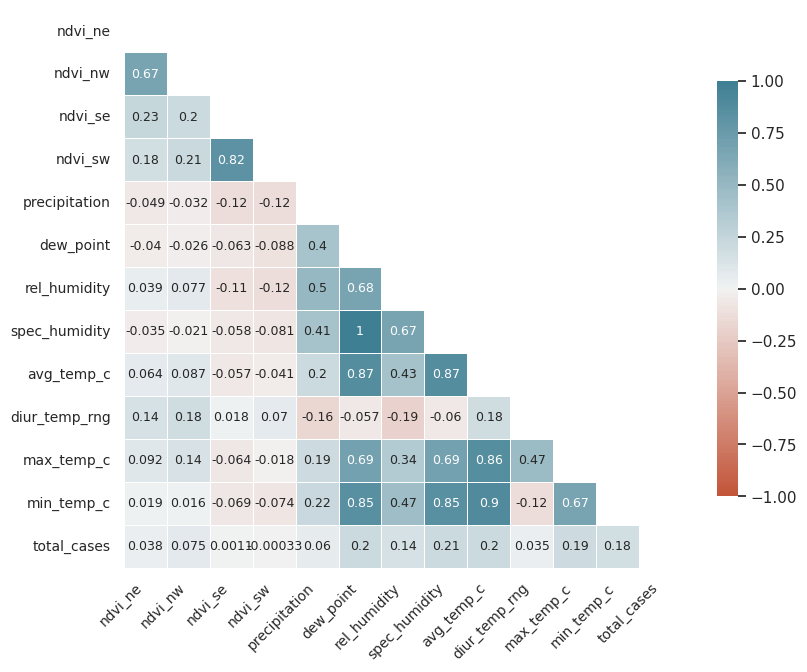

In [ ]:
#Se empleó un mapa de calor para generar la matriz de correlaciones
corr = sj_train_prep.corr(method='pearson')
corr_matrix = np.triu(corr)
sns.set(style="white")
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 9))

sns.heatmap(
    corr, mask = corr_matrix, annot= True, cbar = True,
    annot_kws = {"size": 9}, vmin = -1, vmax = 1, center = 0,
    cmap = sns.diverging_palette(20, 220, n=200), square = True,
    ax = ax, linewidths= 0.5, cbar_kws  = {"shrink": .6})

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right')
ax.tick_params(labelsize = 10)

Se observó que las columnas "spec_humidity" y "dew_point#" están correlacionadas en un 100%, por lo que se decidió remover la columna "dew_point".

In [ ]:
sj_train_prep.drop(['dew_point'], axis = 1, inplace = True)

sj_test_prep.drop(['dew_point'], axis = 1, inplace = True)

*b. Valores faltantes*

Se generó inicialmente un reporte con el conteo de registros faltantes por cada característica.

In [ ]:
#Reporte de conteo de instancias con valores nulos por cada característica
sj_train_prep.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 936 entries, 1990-18 to 2008-17
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ndvi_ne        745 non-null    float64
 1   ndvi_nw        887 non-null    float64
 2   ndvi_se        917 non-null    float64
 3   ndvi_sw        917 non-null    float64
 4   precipitation  927 non-null    float64
 5   rel_humidity   930 non-null    float64
 6   spec_humidity  930 non-null    float64
 7   avg_temp_c     930 non-null    float64
 8   diur_temp_rng  930 non-null    float64
 9   max_temp_c     930 non-null    float64
 10  min_temp_c     930 non-null    float64
 11  total_cases    936 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 95.1+ KB


<ipython-input-16-0683b7d1d2ec>:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  sj_train_prep.info(verbose=True,null_counts=True)


El reporte mostró que, en general, hay una muy buena completitud de los datos, a excepción del índice de diferencia de vegetación noreste y noroeste. Los demás atributos presentan una completitud igual o superior al 98% de las instancias totales.

<Axes: ylabel='date'>

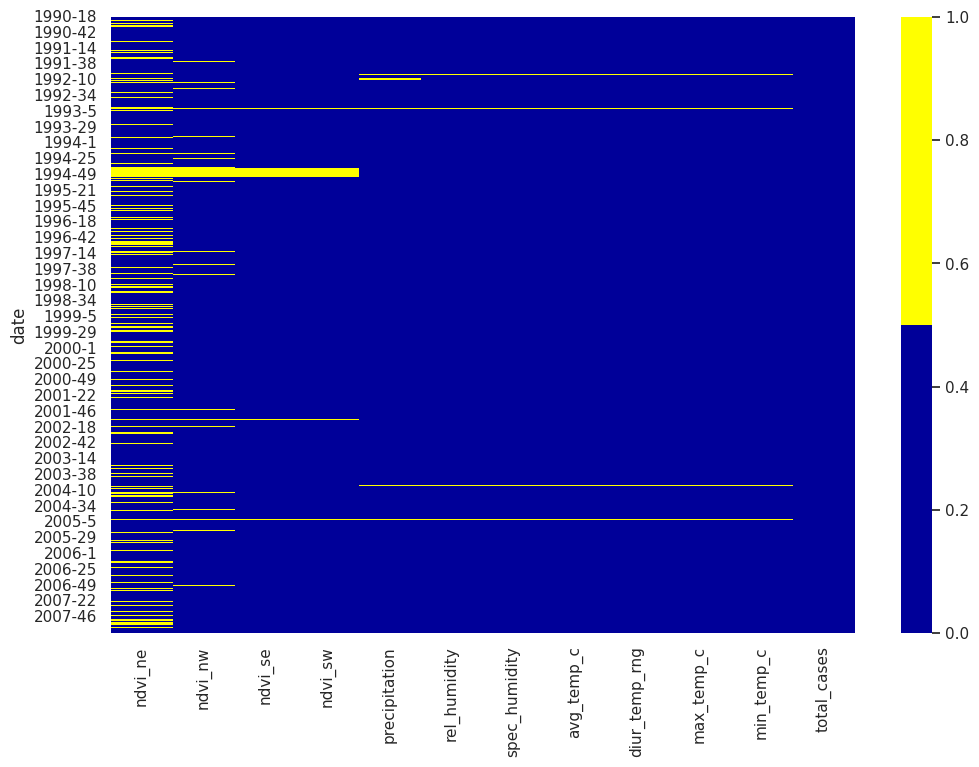

In [ ]:
#Visualización de distribución de valores nulos a lo largo del dataset
from matplotlib import legend
colours = ['#000099', '#ffff00'] # Las secciones de color amarillo, representan datos faltantes
sns.heatmap(sj_train_prep.isnull(), cmap=sns.color_palette(colours))

A partir del reporte generado, se pudo observar que existen ciertas secciones donde la mayoría de las variables ambientales tienen registros faltantes. Para identificar estos datos, se procedió a filtrar los casos del dataset donde una instancia, como la temperatura promedio, es nula.

In [ ]:
#Detalle de registros con el atributo "station_avg_temp_c" nulo
sj_train_prep[sj_train_prep.avg_temp_c.isnull()]

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation,rel_humidity,spec_humidity,avg_temp_c,diur_temp_rng,max_temp_c,min_temp_c,total_cases
date,,,,,,,,,,,,
1992-1,0.1251,0.157867,0.185283,0.181367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81
1993-53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30
1998-1,0.0455,0.047800,0.123986,0.083443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64
1999-53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59
2004-1,-0.2683,-0.123700,0.223757,0.176543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
2005-53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10


Se encontró que la totalidad de instancias con datos faltantes en la fuente de datos de estación también presentan datos faltantes en el dato de precipitación satelital, e incluso la mitad de ellas presentaron nulidad en la totalidad de características ambientales. Debido a la poca información que nos proporcionan estas instancias, se procedió a eliminarlas.

In [ ]:
#Eliminación de las 6 instancias con muy poca completitud
sj_train_prep.drop(sj_train_prep[sj_train_prep.avg_temp_c.isnull()].index, inplace=True)

Se evaluaron diferentes métodos para dar manejo a los valores nulos restantes, dentro de los cuales se encontraron completarlos usando la media, la mediana, interpolando y usando los métos bfill, ffill, bfill, interpolación, media y mediana. El método con el que se obtuvo un menor error fue con el métofo bfill, el cual consiste en replazar los valores nulos con el siguiente valor no nulo.


In [ ]:
# Completar valores perdidos con método ffill
# ffill - forward fill toma al anterior valor que existe y lo mueve hacia adelante donde hace falta.
#sj_train_prep.fillna(method='ffill', inplace=True)
sj_train_prep.fillna(method='bfill', inplace=True)
#sj_train_prep = sj_train_prep.fillna(sj_train_prep.mean())
#sj_train_prep = sj_train_prep.fillna(sj_train_prep.interpolate())
#sj_train_prep.fillna(sj_train_prep.median(), inplace=True)

sj_test_prep.fillna(method='bfill', inplace=True)

In [ ]:
#Conteo de valores perdidos después del tratamiento
sj_train_prep.reset_index().isnull().sum()

date             0
ndvi_ne          0
ndvi_nw          0
ndvi_se          0
ndvi_sw          0
precipitation    0
rel_humidity     0
spec_humidity    0
avg_temp_c       0
diur_temp_rng    0
max_temp_c       0
min_temp_c       0
total_cases      0
dtype: int64

*c. Manejo de instancias duplicadas*

Se validó la existencia de posibles valores duplicados, en este caso, verificando si existían índices duplicados (más de un registro para una misma fecha). Sin embargo, no se encontraron registros repetidos.

In [ ]:
sj_train_prep[sj_train_prep.index.duplicated(keep=False)]

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation,rel_humidity,spec_humidity,avg_temp_c,diur_temp_rng,max_temp_c,min_temp_c,total_cases
date,,,,,,,,,,,,


*d. Manejo de valores fuera de rango (outliers)*

Para la detección de valores fuera de rango se empleó el algoritmo de clustering DBSCAN, el cual puede ser empleado para la detección de valores atípicos. Estos valores corresponden a los últimos a unirse al cluster principal de datos. De esta forma son etiquetados y posteriormente eliminados.

In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

#Carga del conjunto de datos
data = sj_train_prep.drop(['total_cases'], axis=1)
#Estandarización los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

#Aplicación de DBSCAN
epsilon = 3.2  # Radio máximo para la búsqueda de vecinos
min_samples = 26  # Número mínimo de puntos en un grupo
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
clusters = dbscan.fit_predict(data_scaled)
labels = dbscan.labels_

#Adición de los resultados de DBSCAN al DataFrame original
data['cluster'] = clusters

#Identificación y contar los outliers (puntos con etiqueta -1)
outliers = data[data['cluster'] == -1]
print(f'Número de outliers detectados: {len(outliers)}')

filtered_data = data[data['cluster'] == -1]

#Eliminación de instancias etiquetadas
sj_train_prep['cluster'] = clusters
sj_train_prep.drop(sj_train_prep[sj_train_prep['cluster'] == -1].index, inplace=True)
sj_train_prep.drop(['total_cases'], axis=1)
sj_train_prep.drop('cluster', axis=1, inplace=True)


Número de outliers detectados: 9


In [ ]:
# from sklearn.neighbors import NearestNeighbors
# from matplotlib import pyplot as plt

# neighbors = NearestNeighbors(n_neighbors=26)
# neighbors_fit = neighbors.fit(data_scaled)
# distances, indices = neighbors_fit.kneighbors(data_scaled)

# distances = np.sort(distances, axis=0)
# distances = distances[:,1]
# plt.plot(distances)

---
#Preprocesado - Iquitos
---


Empleando el módulo pandas-profiling, se procedió a generar un reporte exploratorio del dataframe que contiene los datos cada ciudad, en este caso, para la ciudad de Iquitos.

In [ ]:
#Se renombró las columnas para facilitar la lectura de las mismas
iq_train_prep.rename(columns = {'precipitation_amt_mm':'precipitation','reanalysis_air_temp_k':'air_temp','reanalysis_avg_temp_k':'avg_temp_k','reanalysis_dew_point_temp_k':'dew_point','reanalysis_max_air_temp_k':'max_air_temp_k','reanalysis_min_air_temp_k':'min_air_temp_k','reanalysis_relative_humidity_percent':'rel_humidity','reanalysis_specific_humidity_g_per_kg':'spec_humidity','reanalysis_tdtr_k':'tdtr_k'}, inplace = True)
iq_test_prep.rename(columns = {'precipitation_amt_mm':'precipitation','reanalysis_air_temp_k':'air_temp','reanalysis_avg_temp_k':'avg_temp_k','reanalysis_dew_point_temp_k':'dew_point','reanalysis_max_air_temp_k':'max_air_temp_k','reanalysis_min_air_temp_k':'min_air_temp_k','reanalysis_relative_humidity_percent':'rel_humidity','reanalysis_specific_humidity_g_per_kg':'spec_humidity','reanalysis_tdtr_k':'tdtr_k'}, inplace = True)

In [ ]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(iq_train_prep, title="iq_train EDA Profiling Report")
# profile.to_file("iq EDA Profiling Report.html")

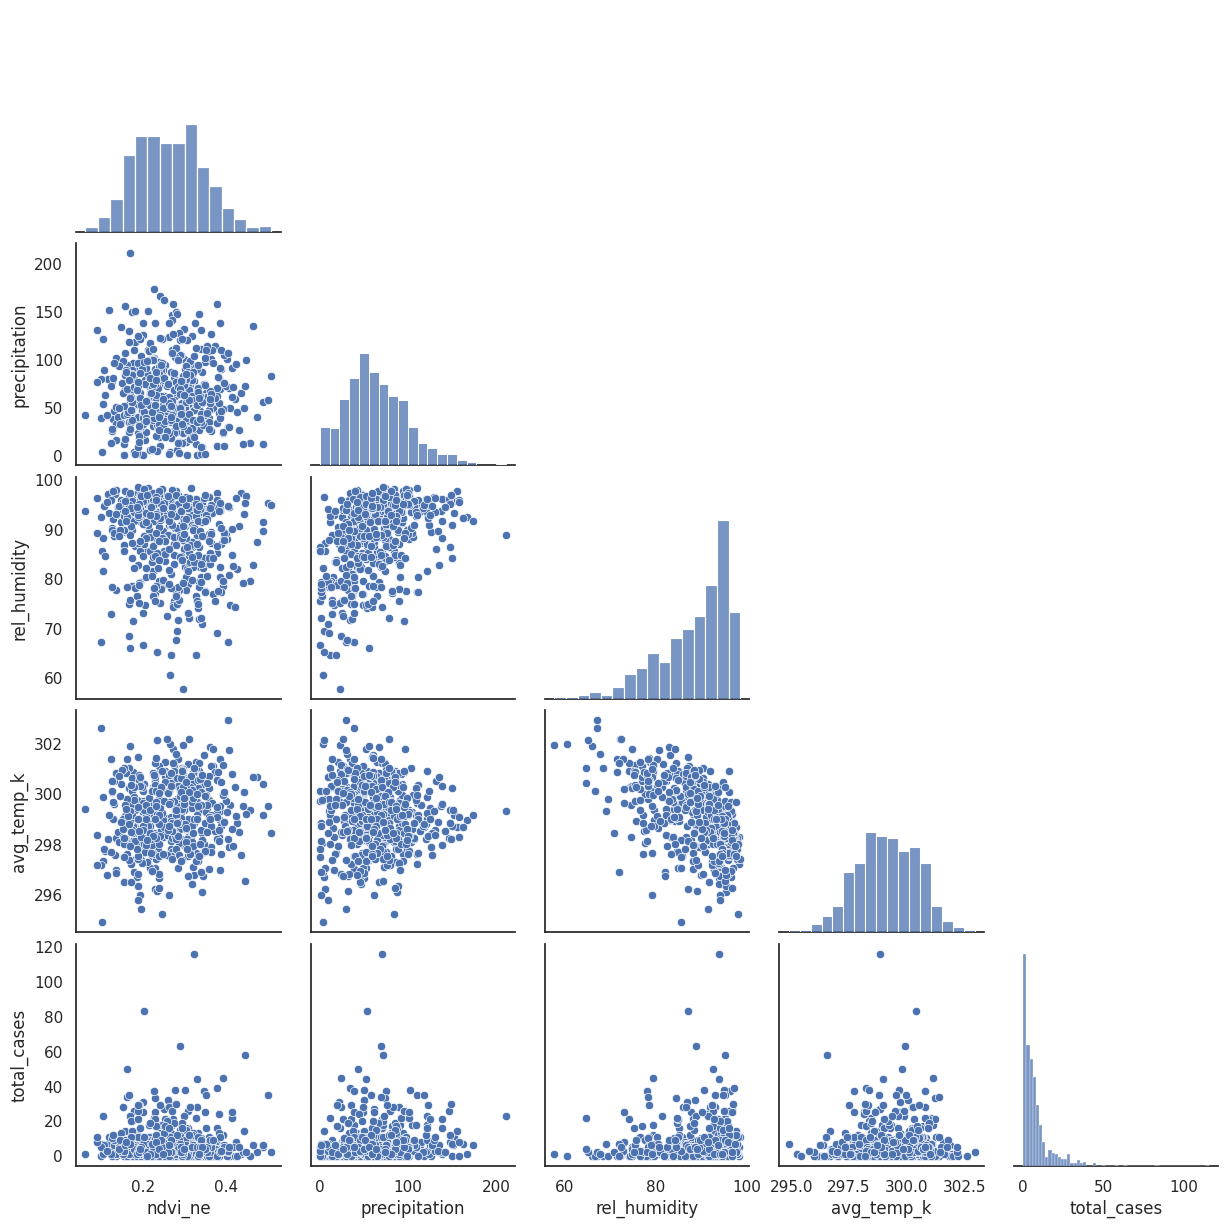

In [ ]:
sns.pairplot(iq_train_prep[['ndvi_ne','precipitation','rel_humidity','avg_temp_k','total_cases']], corner=True)

*a. Datos innecesarios*

In [ ]:
#La columna "week_start_date" es eliminada dado que no será empleada en los posteriores análisis
iq_train_prep.drop("week_start_date", axis = 1, inplace = True)

iq_test_prep.drop("week_start_date", axis = 1, inplace = True)

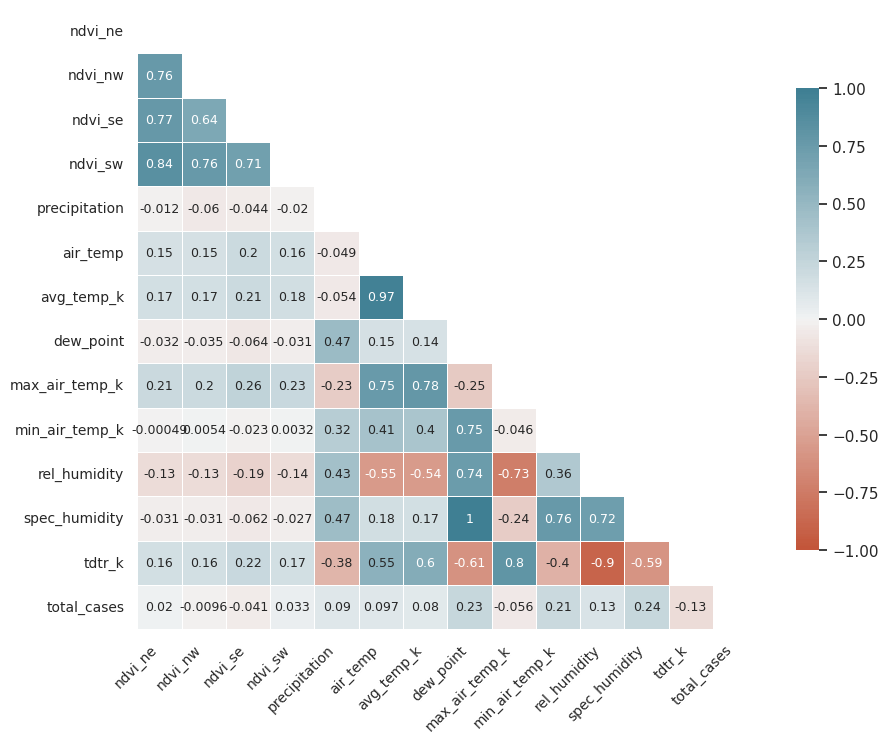

In [ ]:
#Se empleó un mapa de calor para generar la matriz de correlaciones
corr = iq_train_prep.corr(method='pearson')
corr_matrix = np.triu(corr)
sns.set(style="white")
# ==============================================================================
fig, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(
    corr, mask = corr_matrix, annot= True, cbar = True,
    annot_kws = {"size": 9}, vmin = -1, vmax = 1, center = 0,
    cmap = sns.diverging_palette(20, 220, n=200), square = True,
    ax = ax, linewidths= 0.5, cbar_kws  = {"shrink": .6})

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right')
ax.tick_params(labelsize = 10)

Se observó que las columnas "spec_humidity" y "dew_point" así como "avg_temp_k" y "air_temp" están correlacionadas en un 100% y 97%, respectivamente, por lo que se decidió remover las columnas "dew_point" y "air_temp".

In [ ]:
iq_train_prep.drop(['dew_point', 'air_temp'], axis = 1, inplace = True)

iq_test_prep.drop(['dew_point', 'air_temp'], axis = 1, inplace = True)

*b. Valores faltantes*

Se generó inicialmente un reporte con el conteo de registros faltantes por cada característica.

In [ ]:
#Reporte de conteo de instancias con valores nulos por cada característica
iq_train_prep.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 520 entries, 2000-26 to 2010-25
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ndvi_ne         517 non-null    float64
 1   ndvi_nw         517 non-null    float64
 2   ndvi_se         517 non-null    float64
 3   ndvi_sw         517 non-null    float64
 4   precipitation   516 non-null    float64
 5   avg_temp_k      516 non-null    float64
 6   max_air_temp_k  516 non-null    float64
 7   min_air_temp_k  516 non-null    float64
 8   rel_humidity    516 non-null    float64
 9   spec_humidity   516 non-null    float64
 10  tdtr_k          516 non-null    float64
 11  total_cases     520 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 52.8+ KB


<ipython-input-28-ceaff6260db3>:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  iq_train_prep.info(verbose=True,null_counts=True)


El reporte mostró que hay una muy buena completitud de los datos (99.4% de completitud).

<Axes: ylabel='date'>

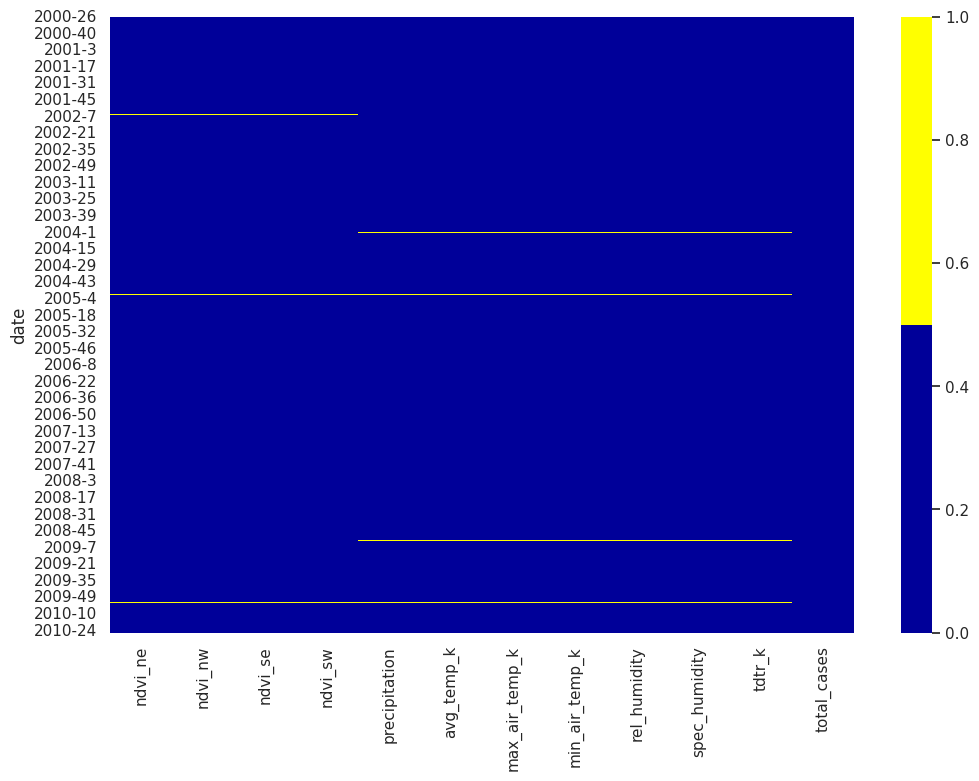

In [ ]:
#Visualización de distribución de valores nulos a lo largo del dataset
from matplotlib import legend
colours = ['#000099', '#ffff00'] #Las secciones de color amarillo, representan datos faltantes
sns.heatmap(iq_train_prep.isnull(), cmap=sns.color_palette(colours))

A partir del reporte generado, se puede observar que existen ciertas secciones donde la mayoría de las variables ambientales tinen registros faltantes. Para identificar estos datos, se procedió a filtrar los casos del dataset donde una instancia, como la temperatura promedio, es nula.

In [ ]:
#Detalle de registros con el atributo "station_avg_temp_c" nulo
iq_train_prep[iq_train_prep.avg_temp_k.isnull()]

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation,avg_temp_k,max_air_temp_k,min_air_temp_k,rel_humidity,spec_humidity,tdtr_k,total_cases
date,,,,,,,,,,,,
2004-1,0.202571,0.198967,0.244557,0.187957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
2005-53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
2009-1,0.151286,0.161686,0.153271,0.119443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2010-53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


Se encontró que la totalidad de instancias con datos faltantes en la fuente de datos de reanalisis también presentan datos faltantes en el dato de precipitación satelital, e incluso la mitad de ellas presentaron nulidad en la totalidad de características ambientales. Debido a la poca información que nos proporcionan estas intancias, se procedió a eliminarlas.

In [ ]:
#Eliminación de las 4 instancias con muy poca completitud
iq_train_prep.drop(iq_train_prep[iq_train_prep.avg_temp_k.isnull()].index, inplace=True)

Se evaluaron diferentes métodos para dar manejo a los valores nulos restantes, dentro de los cuales se encontraron completarlos usando la media, la mediana, interpolando y usando los métos bfill, ffill, bfill, interpolación, media y mediana. El método con el que se obtuvo un menor error fue con el métofo bfill, el cual consiste en replazar los valores nulos con el siguiente valor no nulo.

In [ ]:
# Completar valores perdidos con método ffill
# ffill - forward fill toma al anterior valor que existe y lo mueve hacia adelante donde hace falta.
#sj_train_prep.fillna(method='ffill', inplace=True)
iq_train_prep.fillna(method='bfill', inplace=True)
#sj_train_prep = sj_train_prep.fillna(sj_train_prep.mean())
#sj_train_prep = sj_train_prep.fillna(sj_train_prep.interpolate())
#sj_train_prep.fillna(sj_train_prep.median(), inplace=True)

iq_test_prep.fillna(method='bfill', inplace=True)

In [ ]:
#Conteo de valores perdidos después del tratamiento
iq_train_prep.reset_index().isnull().sum()

date              0
ndvi_ne           0
ndvi_nw           0
ndvi_se           0
ndvi_sw           0
precipitation     0
avg_temp_k        0
max_air_temp_k    0
min_air_temp_k    0
rel_humidity      0
spec_humidity     0
tdtr_k            0
total_cases       0
dtype: int64

*c. Manejo de instancias duplicadas*

Se validó la existencia de posibles valores duplicados, en esta caso, validando si exsitian índices duplicados (más de un registro para una misma fecha). Sin embargo, no se encontrarón registros repetidos.

In [ ]:
iq_train_prep[iq_train_prep.index.duplicated(keep=False)]

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation,avg_temp_k,max_air_temp_k,min_air_temp_k,rel_humidity,spec_humidity,tdtr_k,total_cases
date,,,,,,,,,,,,


*d. Manejo de valores fuera de rango (outliers)*

Para la detección de valores fuera de rango se empleó el algoritmo de clustering DBSCAN, el cual puede ser empleado para la detección de valores atípicos. Estos valores corresponden a los últimos a unirse al cluster principal de datos. De esta forma son etiquetados y posteriormente eliminados.

In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

#Carga del conjunto de datos
data = iq_train_prep.drop(['total_cases'], axis=1)
#Estandarización los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

#Aplicación de DBSCAN
epsilon = 3  # Radio máximo para la búsqueda de vecinos
min_samples = 22  # Número mínimo de puntos en un grupo
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
clusters = dbscan.fit_predict(data_scaled)
labels = dbscan.labels_

#Adición de los resultados de DBSCAN al DataFrame original
data['cluster'] = clusters

#Identificación y contar los outliers (puntos con etiqueta -1)
outliers = data[data['cluster'] == -1]
print(f'Número de outliers detectados: {len(outliers)}')

filtered_data = data[data['cluster'] == -1]

#Eliminación de instancias etiquetadas
iq_train_prep['cluster'] = clusters
iq_train_prep.drop(iq_train_prep[iq_train_prep['cluster'] == -1].index, inplace=True)
iq_train_prep.drop(['total_cases'], axis=1)
iq_train_prep.drop('cluster', axis=1, inplace=True)

Número de outliers detectados: 4


In [ ]:
# from sklearn.neighbors import NearestNeighbors
# from matplotlib import pyplot as plt

# neighbors = NearestNeighbors(n_neighbors=26)
# neighbors_fit = neighbors.fit(data_scaled)
# distances, indices = neighbors_fit.kneighbors(data_scaled)

# distances = np.sort(distances, axis=0)
# distances = distances[:,1]
# plt.plot(distances)

---
#Transformación de datos - San Juan
---

A continuación, se presentan las transformaciones llevadas a cabo.

In [ ]:
sj_train_tran = sj_train_prep.copy()
sj_test_tran = sj_test_prep.copy()

*a. Selección de características*

Se planteó la posibilidad de prescindir de las características: temperatura mínima y máxima, dado que están altamente correlacionadas con la temperatura promedio. Para esto, se realizó una prueba de desempeño evaluando diferentes alternativas de características y se eligió el conjunto de características con menor error. Durante esta prueba se calcularon los resultados del error MAE para dos modelos, random forest y KNN.

In [ ]:
sj_1 = sj_train_tran
sj_2 = sj_train_tran[['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation', 'rel_humidity', 'spec_humidity', 'avg_temp_c', 'diur_temp_rng', 'total_cases']].copy()
sj_3 = sj_train_tran[['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation', 'rel_humidity', 'spec_humidity', 'avg_temp_c', 'total_cases']].copy()
sj_4 = sj_train_tran[['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation', 'spec_humidity', 'avg_temp_c', 'total_cases']].copy()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import neighbors
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
import numpy as np

def evaluate_data_frames(data_frames):
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    regressor_rf = RandomForestRegressor(random_state=42, criterion='absolute_error')
    regressor_knn = neighbors.KNeighborsRegressor()

    for df in data_frames:
        fold_rf_accuracy = []
        fold_knn_accuracy = []
        sj_train_tran = globals()[df]  #Obtención del DataFrame por su nombre
        sj_train_tran = sj_train_tran.reset_index(drop=True)

        for train_fold, test_fold in cv.split(sj_train_tran):
            #División train test aleatoria
            f_train = sj_train_tran.loc[train_fold]
            f_test = sj_train_tran.loc[test_fold]
            #Entrenamiento y ejecución del modelo
            regressor_rf.fit(X=f_train.drop(['total_cases'], axis=1),
                             y=f_train['total_cases'])
            y_rf_pred = regressor_rf.predict(X=f_test.drop(['total_cases'], axis=1))

            regressor_knn.fit(X=f_train.drop(['total_cases'], axis=1),
                              y=f_train['total_cases'])
            y_knn_pred = regressor_knn.predict(X=f_test.drop(['total_cases'], axis=1))

            #Evaluación del modelo
            mae_rf = mean_absolute_error(f_test['total_cases'], y_rf_pred)
            fold_rf_accuracy.append(mae_rf)

            mae_knn = mean_absolute_error(f_test['total_cases'], y_knn_pred)
            fold_knn_accuracy.append(mae_knn)

        rf_avg_score = (sum(fold_rf_accuracy) / len(fold_rf_accuracy))
        knn_avg_score = (sum(fold_knn_accuracy) / len(fold_knn_accuracy))

        print(f"MAE promedio RF para {df}: {rf_avg_score:.2f}")
        print(f"MAE promedio KNN para {df}: {knn_avg_score:.2f}")

#Ejecución de la función con la lista de nombres de DataFrames
data_frames = ['sj_1', 'sj_2', 'sj_3', 'sj_4']
evaluate_data_frames(data_frames)

MAE promedio RF para sj_1: 25.75
MAE promedio KNN para sj_1: 31.02
MAE promedio RF para sj_2: 24.90
MAE promedio KNN para sj_2: 30.59
MAE promedio RF para sj_3: 24.65
MAE promedio KNN para sj_3: 30.13
MAE promedio RF para sj_4: 24.29
MAE promedio KNN para sj_4: 30.88


A partir de los resultados obtenidos, se encontró que los cambios en las características seleccionadas tienen un impacto leve en el MAE promedio calculado. Sin embargo, tras repetir este ejercicio con múltiples semillas aleatorias, en general se encontró que los conjuntos 3 y 4 se desempeñaron mejor que los otros conjuntos. En aras de preservar un modelo de menor complejidad, se seleccionó el conjunto de características número 4, el cual se compone de la siguiente forma:
* ndvi_ne
* ndvi_nw
* ndvi_se
* ndvi_sw
* precipitation
* spec_humidity
* avg_temp_c

In [ ]:
sj_train_tran = sj_train_tran[['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation', 'spec_humidity', 'avg_temp_c', 'total_cases']].copy()
sj_test_tran = sj_test_tran[['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation', 'spec_humidity', 'avg_temp_c']].copy()

*b. Normalización de datos*

In [ ]:
#Normalización de atributos, el conjunto de prueba se normaliza basándose en la normalización del conjunto de entrenamiento.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x_sj_train_tran = scaler.fit_transform(sj_train_tran.drop(['total_cases'], axis=1))
y_sj_train_tran = sj_train_tran['total_cases']
norm_train_sj = np.c_[x_sj_train_tran,y_sj_train_tran]
sj_train_norm = pd.DataFrame(norm_train_sj, columns = ['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation', 'spec_humidity', 'avg_temp_c', 'total_cases'])

x_sj_test_tran = scaler.transform(sj_test_tran)
sj_test_norm = pd.DataFrame(x_sj_test_tran, columns = ['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation', 'spec_humidity', 'avg_temp_c'])

---
#Transformación de datos - Iquitos
---


A continuación, se presentan las transformaciones llevadas a cabo.

In [ ]:
iq_train_tran = iq_train_prep.copy()
iq_test_tran = iq_test_prep.copy()

*a. Selección de caracteristicas*

In [ ]:
iq_1 = iq_train_tran
iq_2 = iq_train_tran[['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation', 'rel_humidity', 'spec_humidity', 'avg_temp_k', 'tdtr_k', 'total_cases']].copy()
iq_3 = iq_train_tran[['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation', 'rel_humidity', 'spec_humidity', 'avg_temp_k', 'total_cases']].copy()
iq_4 = iq_train_tran[['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation', 'rel_humidity', 'avg_temp_k', 'total_cases']].copy()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import neighbors
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
import numpy as np

def evaluate_data_frames(data_frames):
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    regressor_rf = RandomForestRegressor(random_state=42, criterion='absolute_error')
    regressor_knn = neighbors.KNeighborsRegressor()

    for df in data_frames:
        fold_rf_accuracy = []
        fold_knn_accuracy = []
        sj_train_tran = globals()[df]  #Obtención del DataFrame por su nombre
        sj_train_tran = sj_train_tran.reset_index(drop=True)

        for train_fold, test_fold in cv.split(iq_train_tran):
            #División train test aleatoria
            f_train = sj_train_tran.loc[train_fold]
            f_test = sj_train_tran.loc[test_fold]
            #Entrenamiento y ejecución del modelo
            regressor_rf.fit(X=f_train.drop(['total_cases'], axis=1),
                             y=f_train['total_cases'])
            y_rf_pred = regressor_rf.predict(X=f_test.drop(['total_cases'], axis=1))

            regressor_knn.fit(X=f_train.drop(['total_cases'], axis=1),
                              y=f_train['total_cases'])
            y_knn_pred = regressor_knn.predict(X=f_test.drop(['total_cases'], axis=1))

            #Evaluación del modelo
            mae_rf = mean_absolute_error(f_test['total_cases'], y_rf_pred)
            fold_rf_accuracy.append(mae_rf)

            mae_knn = mean_absolute_error(f_test['total_cases'], y_knn_pred)
            fold_knn_accuracy.append(mae_knn)

        rf_avg_score = (sum(fold_rf_accuracy) / len(fold_rf_accuracy))
        knn_avg_score = (sum(fold_knn_accuracy) / len(fold_knn_accuracy))

        print(f"MAE promedio RF para {df}: {rf_avg_score:.2f}")
        print(f"MAE promedio KNN para {df}: {knn_avg_score:.2f}")

#Ejecución de la función con la lista de nombres de DataFrames
data_frames = ['iq_1', 'iq_2', 'iq_3', 'iq_4', 'iq_5']
evaluate_data_frames(data_frames)

MAE promedio RF para iq_1: 7.13
MAE promedio KNN para iq_1: 6.91
MAE promedio RF para iq_2: 7.19
MAE promedio KNN para iq_2: 7.11
MAE promedio RF para iq_3: 7.18
MAE promedio KNN para iq_3: 7.33
MAE promedio RF para iq_4: 7.32
MAE promedio KNN para iq_4: 7.41
MAE promedio RF para iq_5: 7.14
MAE promedio KNN para iq_5: 7.37


A partir de los resultados obtenidos, se encontró que los cambios en las características seleccionadas tienen un impacto leve en el MAE promedio calculado. Sin embargo, tras repetir este ejercicio con múltiples semillas aleatorias, en general se encontró que los conjuntos 1 y 2 se desempeñaron mejor que los otros conjuntos. En aras de preservar un modelo de menor complejidad, se seleccionó el conjunto de características número 2, el cual se compone de la siguiente forma:
* ndvi_ne
* ndvi_nw
* ndvi_se
* ndvi_sw
* precipitation
* rel_humidity
* spec_humidity
* avg_temp_c
* tdtr_k

In [ ]:
iq_train_tran = iq_train_tran[['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation', 'rel_humidity', 'spec_humidity', 'avg_temp_k', 'tdtr_k', 'total_cases']].copy()
iq_test_tran = iq_test_tran[['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation', 'rel_humidity', 'spec_humidity', 'avg_temp_k', 'tdtr_k']].copy()

*b. Normalización de datos*

In [ ]:
#Normalización de atributos: el conjunto de prueba se normaliza basándose en la normalización del conjunto de entrenamiento.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x_iq_train_tran = scaler.fit_transform(iq_train_tran.drop(['total_cases'], axis=1))
y_iq_train_tran = iq_train_tran['total_cases']
norm_train_iq = np.c_[x_iq_train_tran,y_iq_train_tran]
iq_train_norm = pd.DataFrame(norm_train_iq, columns = ['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation', 'rel_humidity', 'spec_humidity', 'avg_temp_k', 'tdtr_k', 'total_cases'])

x_iq_test_tran = scaler.transform(iq_test_tran)
iq_test_norm = pd.DataFrame(x_iq_test_tran, columns = ['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw', 'precipitation', 'rel_humidity', 'spec_humidity', 'avg_temp_k', 'tdtr_k'])

---
#Minería de datos - San Juan
---

Los siguientes algoritmos fueron seleccionados como candidatos para construir el modelo predictivo:

* Random Forest
* KNN
* Decision Tree

A continuación, se presenta la construcción, entrenamiento y evaluación de cada uno de ellos.

In [ ]:
sj_train = sj_train_norm.copy()
sj_train = sj_train.reset_index(drop = True)

sj_test = sj_test_norm.copy()
sj_test = sj_test.reset_index(drop = True)

*a. Random Forest*

Ejecución inicial del algoritmo Random Forest, empleando cross-validation e hiperparámetros por defecto.

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
import numpy as np
#Modelo Random Forest - Ejecución Inicial empleando cross-validacion. Tamaños de conjuntos: Training: 80%, Validation: 20% (respecto a data en sj_train). Hiperparámetros por defecto.
fold_accuracy = []
cv = KFold(n_splits = 5, shuffle = True, random_state=42)
regressor_rf = RandomForestRegressor(random_state=42)

for train_fold, test_fold in cv.split(sj_train):
  #División train test aleatoria
  f_train = sj_train.loc[train_fold]
  f_test = sj_train.loc[test_fold]
  #Entrenamiento y ejecución del modelo
  regressor_rf.fit(X = f_train.drop(['total_cases'], axis=1), y = f_train['total_cases'])
  y_pred = regressor_rf.predict(X = f_test.drop(['total_cases'], axis = 1))
  #Evaluación del modelo
  mae = mean_absolute_error(f_test['total_cases'], y_pred)
  fold_accuracy.append(mae)

rf_avg_score = (sum(fold_accuracy)/len(fold_accuracy))
print(f"MAE promedio RF: {rf_avg_score:.2f}")

MAE promedio RF: 23.03


Se obtuvo un MAE promedio de 23.03 en la ejecución del modelo base. Este error se utilizó para compararlo con el valor obtenido tras optimizar los hiperparámetros del modelo.

Optimización del modelo Random Forest - Empleando Random Search

In [ ]:
#Random Forest
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
#Número de árboles en un bosque aleatorio.
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 150, num = 10)]
#Número de características a considerar en cada división
max_features = [1, 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
#Número máximo de niveles en el árbol
min_samples_split = [2, 5, 10]
#Número mínimo de muestras requeridas en cada nodo hoja
min_samples_leaf = [1, 2, 3, 4]
#Método de selección de muestras para entrenar cada árbol
bootstrap = [True, False]
#Creación del random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

#Uso del random grid para buscar los mejores hiperparámetros
#Primero, se creó el modelo base
rf = RandomForestRegressor(random_state=42)
#Random search de hiperparámetros, empleando 3 pares de conjutos (folds)
#Se realiza la busqueda a lo largo de 100 combinaciones diferentes, empleando todos los núcleos disponibles
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs=-1)
#Ajuste del modelo de búsqueda aleatoria
rf_random.fit(X = sj_train.drop(['total_cases'], axis=1), y = sj_train['total_cases'])
#Obtención de los mejores hiperparámetros encontrados
print('\nHiperparámetros óptimos encontrados:\n')
rf_random.best_params_

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': [1, 'sqrt'],
 'min_samples_leaf': [1, 2, 3, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [50, 61, 72, 83, 94, 105, 116, 127, 138, 150]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits

Hiperparámetros óptimos encontrados:



{'n_estimators': 83,
 'min_samples_split': 10,
 'min_samples_leaf': 3,
 'max_features': 1,
 'max_depth': 10,
 'bootstrap': False}

Posterior a esta búsqueda inicial, se procedió a refinar esta búsqueda, acotando los rangos y en esta ocasión evaluando cada posible combinación.

Optimización del modelo Random Forest - Empleando Grid Search

In [ ]:
#Random Forest
from sklearn.model_selection import GridSearchCV
#Creación del grid de hiperparámetros basado en los resultados de los resultados obtenidos en random search
param_grid = {
    'n_estimators': [70, 80, 90],
    'min_samples_split': [8, 10, 12],
    'min_samples_leaf': [2, 3, 4],
    'max_features': [1, 2],
    'max_depth': [6, 8, 10, 12, 14],
    'bootstrap': [False]
}
#Creación del modelo base
rf = RandomForestRegressor(random_state=42)
#Definición del modelo grid search
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
#Ajuste del grid search a los datos
grid_search.fit(X = sj_train.drop(['total_cases'], axis=1), y = sj_train['total_cases'])
grid_search.best_params_

Fitting 3 folds for each of 270 candidates, totalling 810 fits


{'bootstrap': False,
 'max_depth': 6,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 90}

Finalmente, se obtuvieron los hiperparámetros óptimos para el modelo Random Forest. Tras esto, se procedió a construir el modelo empleando estos hiperparámetros y evaluarlo empleando cross-validation.

In [ ]:
#Random Forest
cv = KFold(n_splits = 5, shuffle = True, random_state=42)
fold_accuracy = []
regressor_rf =  RandomForestRegressor(bootstrap=False, max_depth=6, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators= 90, random_state=42)
for train_fold, test_fold in cv.split(sj_train):
  #División train test aleatoria
  f_train = sj_train.loc[train_fold]
  f_test = sj_train.loc[test_fold]
  #Entrenamiento y ejecución del modelo
  regressor_rf.fit( X = f_train.drop(['total_cases'], axis=1), y = f_train['total_cases'])
  y_pred = regressor_rf.predict(X = f_test.drop(['total_cases'], axis = 1))
  #Evaluación del modelo
  mae = mean_absolute_error(f_test['total_cases'], y_pred)
  fold_accuracy.append(mae)

rf_avg_score = (sum(fold_accuracy)/len(fold_accuracy))
print(f"MAE promedio RF: {rf_avg_score:.2f}")

MAE promedio RF: 22.80


Se obtuvo un error MAE de 22.80 con el modelo Random Forest optimizado. Una vez se optimizó y entrenó el modelo, se procedió a realizar la predicción de los casos totales de dengue en el conjunto de prueba, el cual no había sido visto por el modelo hasta ahora.

In [ ]:
#Random Forest
regressor_rf =  RandomForestRegressor(bootstrap=False, max_depth=6, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators= 90, random_state=42)
#Entrenamiento del modelo y predicción de casos totales para el conjunto de prueba
regressor_rf.fit( X = sj_train.drop(['total_cases'], axis=1), y = sj_train['total_cases'])
y_pred_sj = regressor_rf.predict(X = sj_test)

y_pred = np.rint(y_pred_sj)
y_pred = y_pred.astype(int)
res = np.hstack(y_pred)
download_predictions(submission_sj, res)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloaded practica2_pred_20230926120301.csv


*b. KNN*

Ejecución inicial de algoritmo KNN, empleando cross-validation e hiperparametros por defecto.

In [ ]:
#KNN
from sklearn import neighbors

#Modelo KNN - Ejecución Inicial empleando cross-validacion. Tamaños de conjuntos: Training: 80%, Validation: 20% (respecto a data en sj_train). Hiperparámetros por defecto.
fold_accuracy = []
cv = KFold(n_splits = 5, shuffle = True, random_state=42)
regressor_knn = neighbors.KNeighborsRegressor()

for train_fold, test_fold in cv.split(sj_train):
  #División train test aleatoria
  f_train = sj_train.loc[train_fold]
  f_test = sj_train.loc[test_fold]
  #Entrenamiento y ejecución del modelo
  regressor_knn.fit( X = f_train.drop(['total_cases'], axis=1), y = f_train['total_cases'])
  y_pred = regressor_knn.predict(X = f_test.drop(['total_cases'], axis = 1))
  #Evaluación del modelo
  mae = mean_absolute_error(f_test['total_cases'], y_pred)
  fold_accuracy.append(mae)
knn_avg_score = (sum(fold_accuracy)/len(fold_accuracy))
print(f"MAE promedio KNN: {knn_avg_score:.2f}")

MAE promedio KNN: 25.51


Se obtuvo un MAE promedio de 25.51 en la ejecución del modelo base. Este error se utilizó para compararlo con el valor obtenido tras optimizar los hiperparámetros del modelo.

Optimización del modelo KNN - Empleando Grid Search

In [ ]:
#KNN
from sklearn.model_selection import GridSearchCV
#Creación del grid de hiperparámetros, en este caso no fue requerido realizar un random search inicial, dado a que los escenario a evaluar no son tan amplios.
param_grid = {
    'n_neighbors': [3, 5, 6, 9, 12, 15, 18, 21, 24, 27],
    'weights': ['uniform','distance'],
    'metric': ['minkowski','euclidean','manhattan', 'chebyshev']
}
#Creación del modelo base
knn = neighbors.KNeighborsRegressor()
#Definición del modelo grid search
grid_search = GridSearchCV(estimator = knn, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
#Ajuste del grid search a los datos
grid_search.fit(X = sj_train.drop(['total_cases'], axis=1), y = sj_train['total_cases'])
grid_search.best_params_

Fitting 3 folds for each of 80 candidates, totalling 240 fits


{'metric': 'minkowski', 'n_neighbors': 27, 'weights': 'distance'}

Finalmente, se obtuvieron los hiperparámetros óptimos para el modelo KNN. Tras esto, se procedió a construir el modelo empleando estos hiperparámetros y evaluarlo empleando cross-validation.

In [ ]:
#KNN
cv = KFold(n_splits = 5, shuffle = True, random_state=42)

fold_accuracy = []
knn = neighbors.KNeighborsRegressor(metric = 'minkowski', n_neighbors = 27, weights= 'distance')
for train_fold, test_fold in cv.split(sj_train):
  #División train test aleatoria
  f_train = sj_train.loc[train_fold]
  f_test = sj_train.loc[test_fold]
  #Entrenamiento y ejecución del modelo
  knn.fit( X = f_train.drop(['total_cases'], axis=1),
           y = f_train['total_cases'])
  y_pred = knn.predict(X = f_test.drop(['total_cases'], axis = 1))
  #Evaluación del modelo
  mae = mean_absolute_error(f_test['total_cases'], y_pred)
  fold_accuracy.append(mae)
knn_avg_score = (sum(fold_accuracy)/len(fold_accuracy))
print(f"MAE promedio KNN: {knn_avg_score:.2f}")

MAE promedio KNN: 25.48


Se  obtuvo un error MAE de 25.48 con el modelo KNN optimizado. Una vez se optimizó y entrenó el modelo, se procedió a realizar la predicción de los casos totales de dengue sobre el conjunto de test, el cual no ha visto hasta ahora el modelo.

In [ ]:
#KNN
regresor_knn = neighbors.KNeighborsRegressor(metric = 'minkowski', n_neighbors = 27, weights= 'distance')
#Entrenamiento del modelo y predicción de casos totales para el conjunto de prueba
regresor_knn.fit( X = sj_train.drop(['total_cases'], axis=1), y = sj_train['total_cases'])
y_pred_sj = regresor_knn.predict(X = sj_test)

y_pred = np.rint(y_pred_sj)
y_pred = y_pred.astype(int)
res = np.hstack(y_pred)
download_predictions(submission_sj, res)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloaded practica2_pred_20230926123746.csv


*c. Decision Tree*

Ejecución inicial de algoritmo Decision Tree, empleando cross-validation e hiperparametros por defecto.

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
#Modelo Random Forest - Ejecución Inicial empleando cross-validacion. Tamaños de conjuntos: Training: 80%, Validation: 20% (respecto a data en sj_train). Hiperparámetros por defecto.
fold_accuracy = []
cv = KFold(n_splits = 5, shuffle = True, random_state=42)
regressor_dt = DecisionTreeRegressor(random_state=42)

for train_fold, test_fold in cv.split(sj_train):
  #División train test aleatoria
  f_train = sj_train.loc[train_fold]
  f_test = sj_train.loc[test_fold]
  #Entrenamiento y ejecución del modelo
  regressor_dt.fit(X = f_train.drop(['total_cases'], axis=1),
                   y = f_train['total_cases'])
  y_pred = regressor_dt.predict(X = f_test.drop(['total_cases'], axis = 1))
  #Evaluación del modelo
  mae = mean_absolute_error(f_test['total_cases'], y_pred)
  fold_accuracy.append(mae)

dt_avg_score = (sum(fold_accuracy)/len(fold_accuracy))
print(f"MAE promedio DT: {dt_avg_score:.2f}")

MAE promedio DT: 31.11


Se obtuvo un MAE promedio de 31.11 en la ejecución del modelo base. Este error se utilizó para compararlo con el valor obtenido tras optimizar los hiperparámetros del modelo.

Optimización del modelo Decision Tree - Empleando Grid Search

In [ ]:
#Decision Tree
from sklearn.model_selection import RandomizedSearchCV
max_depth = [int(x) for x in np.linspace(start = 1, stop = 30, num = 15)]
max_leaf_nodes = [int(x) for x in np.linspace(start = 10, stop = 50, num = 5)]
max_leaf_nodes.append(None)
splitter = ['best','random','best']
min_samples_leaf = [1,2,3,4,5,6]
min_weight_fraction_leaf = [0,0.1,0.2,0.3,0.4,0.5]
max_features = [1,'log2','sqrt', None]

#Creación del random grid
random_grid = {'max_depth': max_depth,
               'max_leaf_nodes': max_leaf_nodes,
               'splitter': splitter,
               'min_samples_leaf': min_samples_leaf,
               'min_weight_fraction_leaf' : min_weight_fraction_leaf,
               'max_features': max_features
               }
pprint(random_grid)

#Uso del random grid para buscar los mejores hiperparámetros
#Primero, se creó el modelo base
dt = DecisionTreeRegressor(random_state=42)
#Random search de hiperparámetros, empleando 3 pares de conjutos (folds)
#Se realiza la busqueda a lo largo de 100 combinaciones diferentes, empleando todos los núcleos disponibles
dt_random = RandomizedSearchCV(estimator = dt, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs=-1)
#Ajuste del modelo de búsqueda aleatoria
dt_random.fit(X = sj_train.drop(['total_cases'], axis=1), y = sj_train['total_cases'])
#Obtención de los mejores hiperparámetros encontrados
print('\nHiperparámetros óptimos encontrados:\n')
dt_random.best_params_

{'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 30],
 'max_features': [1, 'log2', 'sqrt', None],
 'max_leaf_nodes': [10, 20, 30, 40, 50, None],
 'min_samples_leaf': [1, 2, 3, 4, 5, 6],
 'min_weight_fraction_leaf': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
 'splitter': ['best', 'random', 'best']}
Fitting 3 folds for each of 100 candidates, totalling 300 fits

Hiperparámetros óptimos encontrados:



{'splitter': 'best',
 'min_weight_fraction_leaf': 0.3,
 'min_samples_leaf': 2,
 'max_leaf_nodes': 30,
 'max_features': 1,
 'max_depth': 13}

Posterior a esta busqueda incial, se procedió a refinar esta busqueda, acotando los rangos y en esta ocasión evaluando cada posible combinación.

Optimización del modelo Decision Tree - Empleando Grid Search

In [ ]:
#Decision Tree
from sklearn.model_selection import GridSearchCV
#Creación del grid de hiperparámetros basado en los resultados de los resultados obtenidos en random search
param_grid = {
    'splitter': ['best'],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_leaf_nodes': [25, 30, 35],
    'max_features': [None, 1],
    'max_depth': [6, 9, 11, 13, 15, 17]
}
#Creación del modelo base
dt = DecisionTreeRegressor(random_state=42)
#Definición del modelo grid search
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
#Ajuste del grid search a los datos
grid_search.fit(X = sj_train.drop(['total_cases'], axis=1), y = sj_train['total_cases'])
grid_search.best_params_

Fitting 3 folds for each of 144 candidates, totalling 432 fits


{'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': 25,
 'min_samples_leaf': 4,
 'splitter': 'best'}

Finalmente, se obtuvieron los hiperparámetros óptimos para el modelo Decision Tree. Tras esto, se procedió a construir el modelo empleando estos hiperparámetros y evaluarlo empleando cross-validation.

In [ ]:
#Decision Tree
cv = KFold(n_splits = 5, shuffle = True, random_state=42)

fold_accuracy = []
dt =  DecisionTreeRegressor(max_depth= 6, max_features=None, max_leaf_nodes=25, min_samples_leaf=4, splitter='best', random_state=42)
for train_fold, test_fold in cv.split(sj_train):
  #División train test aleatoria
  f_train = sj_train.loc[train_fold]
  f_test = sj_train.loc[test_fold]
  #Entrenamiento y ejecución del modelo
  dt.fit( X = f_train.drop(['total_cases'], axis=1),
                 y = f_train['total_cases'])
  y_pred = dt.predict(X = f_test.drop(['total_cases'], axis = 1))
  #Evaluación del modelo
  mae = mean_absolute_error(f_test['total_cases'], y_pred)
  fold_accuracy.append(mae)
dt_avg_score = (sum(fold_accuracy)/len(fold_accuracy))
print(f"MAE promedio DT: {dt_avg_score:.2f}")

MAE promedio DT: 23.73


Se  obtuvo un error MAE de 23.73 con el modelo Decision Tree optimizado. Una vez se optimizó y entrenó el modelo, se procedió a realizar la predicción de los casos totales de dengue sobre el conjunto de test, el cual no ha visto hasta ahora el modelo.

In [ ]:
#Decision Tree
regresor_dt = DecisionTreeRegressor(max_depth= 6, max_features=None, max_leaf_nodes=25, min_samples_leaf=4, splitter='best', random_state=42)
#Entrenamiento del modelo y predicción de casos totales para el conjunto de prueba
regresor_dt.fit( X = sj_train.drop(['total_cases'], axis=1), y = sj_train['total_cases'])
y_pred_sj = regresor_dt.predict(X = sj_test)

y_pred = np.rint(y_pred_sj)
y_pred = y_pred.astype(int)
res = np.hstack(y_pred)
download_predictions(submission_sj, res)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloaded practica2_pred_20230926130249.csv


---
#Minería de datos - Iquitos
---

Los siguientes algoritmos fueron seleccionados como candidatos para construir el modelo predictivo:

* Random Forest
* KNN
* Decision Tree

A continuación, se presenta la construcción, entreamiento y evaluación de cada uno de ellos.

In [ ]:
iq_train = iq_train_norm.copy()
iq_train = iq_train.reset_index(drop = True)

iq_test = iq_test_norm.copy()
iq_test = iq_test.reset_index(drop = True)

*a. Random Forest*

Ejecución inicial del algoritmo Random Forest, empleando cross-validation e hiperparámetros por defecto.

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
import numpy as np
#Modelo Random Forest - Ejecución Inicial empleando cross-validacion. Tamaños de conjuntos: Training: 80%, Validation: 20% (respecto a data en sj_train). Hiperparámetros por defecto.
fold_accuracy = []
cv = KFold(n_splits = 5, shuffle = True, random_state=42)
regressor_rf = RandomForestRegressor(random_state=42)

for train_fold, test_fold in cv.split(iq_train):
  #División train test aleatoria
  f_train = iq_train.loc[train_fold]
  f_test = iq_train.loc[test_fold]
  #Entrenamiento y ejecución del modelo
  regressor_rf.fit(X = f_train.drop(['total_cases'], axis=1), y = f_train['total_cases'])
  y_pred = regressor_rf.predict(X = f_test.drop(['total_cases'], axis = 1))
  #Evaluación del modelo
  mae = mean_absolute_error(f_test['total_cases'], y_pred)
  fold_accuracy.append(mae)

rf_avg_score = (sum(fold_accuracy)/len(fold_accuracy))
print(f"MAE promedio RF: {rf_avg_score:.2f}")

MAE promedio RF: 7.18


Se obtuvo un MAE promedio de 7.18 en la ejecución del modelo base. Este error se utilizó para compararlo con el valor obtenido tras optimizar los hiperparámetros del modelo.

Optimización del modelo Random Forest - Empleando Random Search

In [ ]:
#Random Forest
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 150, num = 10)]
max_features = [1, 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 3, 4]
bootstrap = [True, False]
#Creación del random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

#Uso del random grid para buscar los mejores hiperparámetros
#Primero, se creó el modelo base
rf = RandomForestRegressor(random_state=42)
#Random search de hiperparámetros, empleando 3 pares de conjutos (folds)
#Se realiza la busqueda a lo largo de 100 combinaciones diferentes, empleando todos los núcleos disponibles
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs=-1)
#Ajuste del modelo de búsqueda aleatoria
rf_random.fit(X = iq_train.drop(['total_cases'], axis=1), y = iq_train['total_cases'])
#Obtención de los mejores hiperparámetros encontrados
print('\nParámetros óptimos encontrados:\n')
rf_random.best_params_

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': [1, 'sqrt'],
 'min_samples_leaf': [1, 2, 3, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [50, 61, 72, 83, 94, 105, 116, 127, 138, 150]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits

Parámetros óptimos encontrados:



{'n_estimators': 61,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 1,
 'max_depth': 10,
 'bootstrap': True}

Posterior a esta busqueda incial, se procedió a refinar esta bÚsqueda, acotando los rangos y en esta ocasión evaluando cada posible combinación.

Optimización del modelo Random Forest - Empleando Grid Search

In [ ]:
#Random Forest
from sklearn.model_selection import GridSearchCV
#Creación del grid de hiperparámetros basado en los resultados de los resultados obtenidos en random search
param_grid = {
    'n_estimators': [50, 60, 70],
    'min_samples_split': [3, 5, 7],
    'min_samples_leaf': [3, 4, 5],
    'max_features': [1, 2],
    'max_depth': [6, 8, 10, 12, 14],
    'bootstrap': [True]
}
#Creación del modelo base
rf = RandomForestRegressor(random_state=42)
#Definición del modelo grid search
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
#Ajuste del grid search a los datos
grid_search.fit(X = iq_train.drop(['total_cases'], axis=1), y = iq_train['total_cases'])
grid_search.best_params_

Fitting 3 folds for each of 270 candidates, totalling 810 fits


{'bootstrap': True,
 'max_depth': 10,
 'max_features': 1,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 70}

Finalmente, se obtuvieron los hiperparámetros óptimos para el modelo Random Forest. Tras esto, se procedió a construir el modelo empleando estos hiperparámetros y evaluarlo empleando cross-validation.

In [ ]:
#Random Forest
cv = KFold(n_splits = 5, shuffle = True, random_state=42)
fold_accuracy = []
regressor_rf =  RandomForestRegressor(bootstrap=True, max_depth=10, max_features=1, min_samples_leaf=3, min_samples_split=7, n_estimators= 70, random_state=42)
for train_fold, test_fold in cv.split(iq_train):
  #División train test aleatoria
  f_train = iq_train.loc[train_fold]
  f_test = iq_train.loc[test_fold]
  #Entrenamiento y ejecución del modelo
  regressor_rf.fit( X = f_train.drop(['total_cases'], axis=1), y = f_train['total_cases'])
  y_pred = regressor_rf.predict(X = f_test.drop(['total_cases'], axis = 1))
  #Evaluación del modelo
  mae = mean_absolute_error(f_test['total_cases'], y_pred)
  fold_accuracy.append(mae)

rf_avg_score = (sum(fold_accuracy)/len(fold_accuracy))
print(f"MAE promedio RF: {rf_avg_score:.2f}")

MAE promedio RF: 6.62


Se  obtuvo un error MAE de 6.62 con el modelo Random Forest optimizado. Una vez se optimizó y entrenó el modelo, se procedió a realizar la predicción de los casos totales de dengue sobre el conjunto de test, el cual no ha visto hasta ahora el modelo.

In [ ]:
#Random Forest
regressor_rf =  RandomForestRegressor(bootstrap=True, max_depth=10, max_features=1, min_samples_leaf=3, min_samples_split=7, n_estimators= 70, random_state=42)
#Entrenamiento del modelo y predicción de casos totales para el conjunto de prueba
regressor_rf.fit( X = iq_train.drop(['total_cases'], axis=1), y = iq_train['total_cases'])
y_pred_iq = regressor_rf.predict(X = iq_test)

y_pred = np.rint(y_pred_iq)
y_pred = y_pred.astype(int)
res = np.hstack(y_pred)
download_predictions(submission_iq, res)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloaded practica2_pred_20230926131439.csv


*b. KNN*

Ejecución inicial de algoritmo KNN, empleando cross-validation e hiperpárametros por defecto.

In [ ]:
#KNN
from sklearn import neighbors

#Modelo KNN - Ejecución Inicial empleando cross-validacion. Tamaños de conjuntos: Training: 80%, Validation: 20% (respecto a data en sj_train). Hiperparámetros por defecto.
fold_accuracy = []
cv = KFold(n_splits = 5, shuffle = True, random_state=42)
regressor_knn = neighbors.KNeighborsRegressor()

for train_fold, test_fold in cv.split(iq_train):
  #División train test aleatoria
  f_train = iq_train.loc[train_fold]
  f_test = iq_train.loc[test_fold]
  #Entrenamiento y ejecución del modelo
  regressor_knn.fit( X = f_train.drop(['total_cases'], axis=1), y = f_train['total_cases'])
  y_pred = regressor_knn.predict(X = f_test.drop(['total_cases'], axis = 1))
  #Evaluación del modelo
  mae = mean_absolute_error(f_test['total_cases'], y_pred)
  fold_accuracy.append(mae)
knn_avg_score = (sum(fold_accuracy)/len(fold_accuracy))
print(f"MAE promedio KNN: {knn_avg_score:.2f}")

MAE promedio KNN: 7.67


Se obtuvo un MAE promedio de 7.67 en la ejecución del modelo base. Este error se utilizó para compararlo con el valor obtenido tras optimizar los hiperparámetros del modelo.

Optimización del modelo KNN - Empleando Grid Search

In [ ]:
#KNN
from sklearn.model_selection import GridSearchCV
#Creación del grid de hiperparámetros, en este caso no fue requerido realizar un random search inicial, dado a que los escenario a evaluar no son tan amplios.
param_grid = {
    'n_neighbors': [3, 5, 6, 9, 12, 15, 18, 21, 24, 27],
    'weights': ['uniform','distance'],
    'metric': ['minkowski','euclidean','manhattan', 'chebyshev']
}
#Creación del modelo base
knn = neighbors.KNeighborsRegressor()
#Definición del modelo grid search
grid_search = GridSearchCV(estimator = knn, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
#Ajuste del grid search a los datos
grid_search.fit(X = iq_train.drop(['total_cases'], axis=1), y = iq_train['total_cases'])
grid_search.best_params_

Fitting 3 folds for each of 80 candidates, totalling 240 fits


{'metric': 'chebyshev', 'n_neighbors': 27, 'weights': 'uniform'}

Finalmente, se obtuvieron los hiperparámetros óptimos para el modelo KNN. Tras esto, se procedió a construir el modelo empleando estos hiperparámetros y evaluarlo empleando cross-validation.

In [ ]:
#KNN
cv = KFold(n_splits = 5, shuffle = True, random_state=42)

fold_accuracy = []
knn = neighbors.KNeighborsRegressor(metric = 'chebyshev', n_neighbors = 27, weights= 'uniform')
for train_fold, test_fold in cv.split(iq_train):
  #División train test aleatoria
  f_train = iq_train.loc[train_fold]
  f_test = iq_train.loc[test_fold]
  #Entrenamiento y ejecución del modelo
  knn.fit( X = f_train.drop(['total_cases'], axis=1), y = f_train['total_cases'])
  y_pred = knn.predict(X = f_test.drop(['total_cases'], axis = 1))
  #Evaluación del modelo
  mae = mean_absolute_error(f_test['total_cases'], y_pred)
  fold_accuracy.append(mae)
knn_avg_score = (sum(fold_accuracy)/len(fold_accuracy))
print(f"MAE promedio KNN: {knn_avg_score:.2f}")

MAE promedio KNN: 6.73


Se  obtuvo un error MAE de 6.73 con el modelo KNN optimizado. Una vez se optimizó y entrenó el modelo, se procedió a realizar la predicción de los casos totales de dengue sobre el conjunto de test, el cual no ha visto hasta ahora el modelo.

In [ ]:
#KNN
regresor_knn = neighbors.KNeighborsRegressor(metric = 'chebyshev', n_neighbors = 27, weights= 'uniform')
#Entrenamiento del modelo y predicción de casos totales para el conjunto de prueba
regresor_knn.fit( X = iq_train.drop(['total_cases'], axis=1), y = iq_train['total_cases'])
y_pred_iq = regresor_knn.predict(X = iq_test)

y_pred = np.rint(y_pred_iq)
y_pred = y_pred.astype(int)
res = np.hstack(y_pred)
download_predictions(submission_iq, res)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloaded practica2_pred_20230926131801.csv


*c. Decision Tree*

Ejecución inicial de algoritmo Decision Tree, empleando cross-validation e hiperparámetros por defecto.

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
#Modelo Random Forest - Ejecución Inicial empleando cross-validacion. Tamaños de conjuntos: Training: 80%, Validation: 20% (respecto a data en sj_train). Hiperparámetros por defecto.
fold_accuracy = []
cv = KFold(n_splits = 5, shuffle = True, random_state=42)
regressor_dt = DecisionTreeRegressor(random_state=42)

for train_fold, test_fold in cv.split(iq_train):
  #División train test aleatoria
  f_train = iq_train.loc[train_fold]
  f_test = iq_train.loc[test_fold]
  #Entrenamiento y ejecución del modelo
  regressor_dt.fit(X = f_train.drop(['total_cases'], axis=1), y = f_train['total_cases'])
  y_pred = regressor_dt.predict(X = f_test.drop(['total_cases'], axis = 1))
  #Evaluación del modelo
  mae = mean_absolute_error(f_test['total_cases'], y_pred)
  fold_accuracy.append(mae)

dt_avg_score = (sum(fold_accuracy)/len(fold_accuracy))
print(f"MAE promedio DT: {dt_avg_score:.2f}")

MAE promedio DT: 8.69


Se obtuvo un MAE promedio de 8.69 en la ejecución del modelo base. Este error se utilizó para compararlo con el valor obtenido tras optimizar los hiperparámetros del modelo.

Optimización del modelo Decision Tree - Empleando Grid Search

In [ ]:
#Decision Tree
from sklearn.model_selection import RandomizedSearchCV
max_depth = [int(x) for x in np.linspace(start = 1, stop = 30, num = 15)]
max_leaf_nodes = [int(x) for x in np.linspace(start = 10, stop = 50, num = 5)]
max_leaf_nodes.append(None)
splitter = ['best','random','best']
min_samples_leaf = [1,2,3,4,5,6]
min_weight_fraction_leaf = [0,0.1,0.2,0.3,0.4,0.5]
max_features = [1,'log2','sqrt', None]

#Creación del random grid
random_grid = {'max_depth': max_depth,
               'max_leaf_nodes': max_leaf_nodes,
               'splitter': splitter,
               'min_samples_leaf': min_samples_leaf,
               #'min_weight_fraction_leaf' : min_weight_fraction_leaf,
               'max_features': max_features
               }
pprint(random_grid)

#Uso del random grid para buscar los mejores hiperparámetros
#Primero, se creó el modelo base
dt = DecisionTreeRegressor(random_state=42)
#Random search de hiperparámetros, empleando 3 pares de conjutos (folds)
#Se realiza la busqueda a lo largo de 100 combinaciones diferentes, empleando todos los núcleos disponibles
dt_random = RandomizedSearchCV(estimator = dt, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs=-1)
#Ajuste del modelo de búsqueda aleatoria
dt_random.fit(X = iq_train.drop(['total_cases'], axis=1), y = iq_train['total_cases'])
#Obtención de los mejores hiperparámetros encontrados
print('\nHiperparámetros óptimos encontrados:\n')
dt_random.best_params_

{'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 30],
 'max_features': [1, 'log2', 'sqrt', None],
 'max_leaf_nodes': [10, 20, 30, 40, 50, None],
 'min_samples_leaf': [1, 2, 3, 4, 5, 6],
 'splitter': ['best', 'random', 'best']}
Fitting 3 folds for each of 100 candidates, totalling 300 fits

Hiperparámetros óptimos encontrados:



{'splitter': 'best',
 'min_samples_leaf': 4,
 'max_leaf_nodes': 20,
 'max_features': None,
 'max_depth': 1}

Posterior a esta busqueda incial, se procedió a refinar esta busqueda, acotando los rangos y en esta ocasión evaluando cada posible combinación.

Optimización del modelo Decision Tree - Empleando Grid Search

In [ ]:
#Decision Tree
from sklearn.model_selection import GridSearchCV
#Creación del grid de hiperparámetros basado en los resultados de los resultados obtenidos en random search
param_grid = {
    'splitter': ['best'],
    'min_samples_leaf': [3, 4, 5, 6],
    'max_leaf_nodes': [15, 20, 25],
    'max_features': [None, 1],
    'max_depth': [1, 2, 3, 4]
}
#Creación del modelo base
dt = DecisionTreeRegressor(random_state=42)
#Definición del modelo grid search
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
#Ajuste del grid search a los datos
grid_search.fit(X = iq_train.drop(['total_cases'], axis=1), y = iq_train['total_cases'])
grid_search.best_params_

Fitting 3 folds for each of 96 candidates, totalling 288 fits


{'max_depth': 1,
 'max_features': None,
 'max_leaf_nodes': 15,
 'min_samples_leaf': 3,
 'splitter': 'best'}

Finalmente, se obtuvieron los hiperparámetros óptimos para el modelo Decision Tree. Tras esto, se procedió a construir el modelo empleando estos hiperparámetros y evaluarlo empleando cross-validation.

In [ ]:
#Decision Tree
cv = KFold(n_splits = 5, shuffle = True, random_state=42)

fold_accuracy = []
dt =  DecisionTreeRegressor(max_depth= 1, max_features=None, max_leaf_nodes=15, min_samples_leaf=3, splitter='best', random_state=42)
for train_fold, test_fold in cv.split(iq_train):
  #División train test aleatoria
  f_train = iq_train.loc[train_fold]
  f_test = iq_train.loc[test_fold]
  #Entrenamiento y ejecución del modelo
  dt.fit( X = f_train.drop(['total_cases'], axis=1), y = f_train['total_cases'])
  y_pred = dt.predict(X = f_test.drop(['total_cases'], axis = 1))
  #Evaluación del modelo
  mae = mean_absolute_error(f_test['total_cases'], y_pred)
  fold_accuracy.append(mae)
dt_avg_score = (sum(fold_accuracy)/len(fold_accuracy))
print(f"MAE promedio DT: {dt_avg_score:.2f}")

MAE promedio DT: 6.35


Se  obtuvo un error MAE de 6.35 con el modelo Decision Tree optimizado. Una vez se optimizó y entrenó el modelo, se procedió a realizar la predicción de los casos totales de dengue sobre el conjunto de test, el cual no ha visto hasta ahora el modelo.

In [ ]:
#Decision Tree
regresor_dt = DecisionTreeRegressor(max_depth= 6, max_features=None, max_leaf_nodes=25, min_samples_leaf=4, splitter='best', random_state=42)
#Entrenamiento del modelo y predicción de casos totales para el conjunto de prueba
regresor_dt.fit( X = iq_train.drop(['total_cases'], axis=1), y = iq_train['total_cases'])
y_pred_iq = regresor_dt.predict(X = iq_test)

y_pred = np.rint(y_pred_iq)
y_pred = y_pred.astype(int)
res = np.hstack(y_pred)
download_predictions(submission_iq, res)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloaded practica2_pred_20230926132256.csv


Escenario: Tres semanas de retraso

Esta prueba de escenario examina cómo las condiciones climáticas de tres semanas atrás pueden tener el mayor impacto en el número de casos reportados en un momento dado.

SAN JUAN

In [ ]:
sj_train_3weeks = sj_train_norm.copy()
sj_train_3weeks = sj_train_3weeks.reset_index(drop = True)

sj_test_3weeks = sj_test_norm.copy()
sj_test_3weeks = sj_test_3weeks.reset_index(drop = True)

In [ ]:
#Dataframe antes del desplazamiento
sj_train_3weeks

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation,spec_humidity,avg_temp_c,total_cases
0,0.587840,0.553536,0.496969,0.541965,0.050543,0.297392,0.315011,4.0
1,0.640416,0.605029,0.403607,0.492212,0.092866,0.473460,0.503171,5.0
2,0.487412,0.646266,0.390279,0.526737,0.140561,0.664509,0.503171,4.0
3,0.594546,0.742824,0.572106,0.672961,0.062508,0.641761,0.615222,3.0
4,0.669649,0.765769,0.633208,0.698712,0.030603,0.711300,0.832981,6.0
...,...,...,...,...,...,...,...,...
916,0.538098,0.361189,0.786385,0.808652,0.110650,0.249676,0.255814,4.0
917,0.409326,0.392081,0.292517,0.291904,0.015546,0.381542,0.433404,3.0
918,0.279053,0.343980,0.340032,0.460128,0.069019,0.319586,0.249471,1.0
919,0.453565,0.400741,0.510968,0.614414,0.000000,0.277418,0.295983,3.0


In [ ]:
#El dataframe es desplazado tres filas hacia abajo, a excepción del número de casos totales
sj_train_3weeks.iloc[:, :-1] = sj_train_3weeks.iloc[:, :-1].shift(3)
#Las tres primeras filas son eliminadas, dado a que no cuentan con datos de características
sj_train_3weeks = sj_train_3weeks.iloc[3:]
sj_train_3weeks = sj_train_3weeks.reset_index(drop = True)
sj_train_3weeks

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation,spec_humidity,avg_temp_c,total_cases
0,0.587840,0.553536,0.496969,0.541965,0.050543,0.297392,0.315011,3.0
1,0.640416,0.605029,0.403607,0.492212,0.092866,0.473460,0.503171,6.0
2,0.487412,0.646266,0.390279,0.526737,0.140561,0.664509,0.503171,2.0
3,0.594546,0.742824,0.572106,0.672961,0.062508,0.641761,0.615222,4.0
4,0.669649,0.765769,0.633208,0.698712,0.030603,0.711300,0.832981,5.0
...,...,...,...,...,...,...,...,...
913,0.352748,0.294049,0.560957,0.489289,0.000000,0.357130,0.266385,4.0
914,0.094314,0.225526,0.269960,0.459678,0.000000,0.259663,0.298097,3.0
915,0.501473,0.447368,0.246663,0.340495,0.000000,0.261698,0.279070,1.0
916,0.538098,0.361189,0.786385,0.808652,0.110650,0.249676,0.255814,3.0


*a. Random Forest*

In [ ]:
#Random Forest
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 150, num = 10)]
max_features = [1, 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 3, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

rf = RandomForestRegressor(random_state=42)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(X = sj_train_3weeks.drop(['total_cases'], axis=1), y = sj_train_3weeks['total_cases'])
print('\nHiperparámetros óptimos encontrados:\n')
rf_random.best_params_

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': [1, 'sqrt'],
 'min_samples_leaf': [1, 2, 3, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [50, 61, 72, 83, 94, 105, 116, 127, 138, 150]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits

Hiperparámetros óptimos encontrados:



{'n_estimators': 72,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 1,
 'max_depth': 50,
 'bootstrap': True}

Optimización del modelo Random Forest - Empleando Grid Search

In [ ]:
#Random Forest
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [60, 70, 80],
    'min_samples_split': [4, 5, 6],
    'min_samples_leaf': [2, 3, 4],
    'max_features': [1, 2],
    'max_depth': [40, 45, 50, 55, 60],
    'bootstrap': [True]
}
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X = sj_train_3weeks.drop(['total_cases'], axis=1), y = sj_train_3weeks['total_cases'])
grid_search.best_params_

Fitting 3 folds for each of 270 candidates, totalling 810 fits


{'bootstrap': True,
 'max_depth': 40,
 'max_features': 1,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 70}

Finalmente, se obtuvieron los hiperparámetros óptimos para el modelo Random Forest. Tras esto, se procedió a construir el modelo empleando estos hiperparámetros y evaluarlo empleando cross-validation.

In [ ]:
#Random Forest
cv = KFold(n_splits = 5, shuffle = True, random_state=42)
fold_accuracy = []
regressor_rf =  RandomForestRegressor(bootstrap=True, max_depth=40, max_features=1, min_samples_leaf=2, min_samples_split=5, n_estimators= 70, random_state=42)
for train_fold, test_fold in cv.split(sj_train_3weeks):
  f_train = sj_train_3weeks.loc[train_fold]
  f_test = sj_train_3weeks.loc[test_fold]
  regressor_rf.fit( X = f_train.drop(['total_cases'], axis=1), y = f_train['total_cases'])
  y_pred = regressor_rf.predict(X = f_test.drop(['total_cases'], axis = 1))
  mae = mean_absolute_error(f_test['total_cases'], y_pred)
  fold_accuracy.append(mae)

rf_avg_score = (sum(fold_accuracy)/len(fold_accuracy))
print(f"MAE promedio RF: {rf_avg_score:.2f}")

MAE promedio RF: 24.06


Se obtuvo un error MAE de 24.06 con el modelo Random Forest optimizado. Una vez se optimizó y entrenó el modelo, se procedió a realizar la predicción de los casos totales de dengue en el conjunto de prueba, el cual no había sido visto por el modelo hasta ahora.

In [ ]:
#Random Forest
regressor_rf =  RandomForestRegressor(bootstrap=True, max_depth=40, max_features=1, min_samples_leaf=2, min_samples_split=5, n_estimators= 70, random_state=42)
#Entrenamiento del modelo y predicción de casos totales para el conjunto de prueba
regressor_rf.fit( X = sj_train_3weeks.drop(['total_cases'], axis=1), y = sj_train_3weeks['total_cases'])
y_pred_sj = regressor_rf.predict(X = sj_test)

y_pred = np.rint(y_pred_sj)
y_pred = y_pred.astype(int)
res = np.hstack(y_pred)
download_predictions(submission_sj, res)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloaded practica2_pred_20231001015941.csv


*b. KNN*

Optimización del modelo KNN - Empleando Grid Search

In [ ]:
#KNN
from sklearn.model_selection import GridSearchCV
#Creación del grid de hiperparámetros, en este caso no fue requerido realizar un random search inicial, dado a que los escenario a evaluar no son tan amplios.
param_grid = {
    'n_neighbors': [3, 5, 6, 9, 12, 15, 18, 21, 24, 27],
    'weights': ['uniform','distance'],
    'metric': ['minkowski','euclidean','manhattan', 'chebyshev']
}
#Creación del modelo base
knn = neighbors.KNeighborsRegressor()
#Definición del modelo grid search
grid_search = GridSearchCV(estimator = knn, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
#Ajuste del grid search a los datos
grid_search.fit(X = sj_train_3weeks.drop(['total_cases'], axis=1), y = sj_train_3weeks['total_cases'])
grid_search.best_params_

Fitting 3 folds for each of 80 candidates, totalling 240 fits


{'metric': 'minkowski', 'n_neighbors': 24, 'weights': 'uniform'}

Finalmente, se obtuvieron los hiperparámetros óptimos para el modelo KNN. Tras esto, se procedió a construir el modelo empleando estos hiperparámetros y evaluarlo empleando cross-validation.

In [ ]:
#KNN
cv = KFold(n_splits = 5, shuffle = True, random_state=42)

fold_accuracy = []
knn = neighbors.KNeighborsRegressor(metric = 'minkowski', n_neighbors = 24, weights= 'uniform')
for train_fold, test_fold in cv.split(sj_train_3weeks):
  #División train test aleatoria
  f_train = sj_train_3weeks.loc[train_fold]
  f_test = sj_train_3weeks.loc[test_fold]
  #Entrenamiento y ejecución del modelo
  knn.fit( X = f_train.drop(['total_cases'], axis=1),
           y = f_train['total_cases'])
  y_pred = knn.predict(X = f_test.drop(['total_cases'], axis = 1))
  #Evaluación del modelo
  mae = mean_absolute_error(f_test['total_cases'], y_pred)
  fold_accuracy.append(mae)
knn_avg_score = (sum(fold_accuracy)/len(fold_accuracy))
print(f"MAE promedio KNN: {knn_avg_score:.2f}")

MAE promedio KNN: 25.05


Se  obtuvo un error MAE de 25.05 con el modelo KNN optimizado. Una vez se optimizó y entrenó el modelo, se procedió a realizar la predicción de los casos totales de dengue sobre el conjunto de test, el cual no ha visto hasta ahora el modelo.

In [ ]:
#KNN
regresor_knn = neighbors.KNeighborsRegressor(metric = 'minkowski', n_neighbors = 24, weights= 'uniform')
#Entrenamiento del modelo y predicción de casos totales para el conjunto de prueba
regresor_knn.fit( X = sj_train_3weeks.drop(['total_cases'], axis=1), y = sj_train_3weeks['total_cases'])
y_pred_sj = regresor_knn.predict(X = sj_test)

y_pred = np.rint(y_pred_sj)
y_pred = y_pred.astype(int)
res = np.hstack(y_pred)
download_predictions(submission_sj, res)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloaded practica2_pred_20231001020142.csv


IQUITOS

In [ ]:
iq_train_3weeks = iq_train_norm.copy()
iq_train_3weeks = iq_train_3weeks.reset_index(drop = True)

iq_test_3weeks = iq_test_norm.copy()
iq_test_3weeks = iq_test_3weeks.reset_index(drop = True)

In [ ]:
#Dataframe antes del desplazamiento
iq_train_3weeks

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation,rel_humidity,spec_humidity,avg_temp_k,tdtr_k,total_cases
0,0.298559,0.189890,0.684423,0.379113,0.120524,0.848334,0.543713,0.460986,0.423434,0.0
1,0.353072,0.562492,0.571245,0.367596,0.287483,0.876820,0.569033,0.457906,0.535963,0.0
2,0.261845,0.295761,0.383433,0.131467,0.263340,0.932356,0.599829,0.309035,0.298144,0.0
3,0.377874,0.224009,0.493656,0.281693,0.026562,0.721340,0.277844,0.141684,0.438515,0.0
4,0.607590,0.681722,0.494033,0.615658,0.297681,0.744051,0.399145,0.343943,0.469838,0.0
...,...,...,...,...,...,...,...,...,...,...
507,0.639703,0.673358,0.498372,0.473268,0.262297,0.758854,0.763388,0.794661,0.494200,5.0
508,0.224058,0.262716,0.233630,0.334351,0.410141,0.828282,0.713601,0.596509,0.305104,8.0
509,0.421872,0.225637,0.485199,0.351092,0.279562,0.893932,0.586484,0.337782,0.307425,1.0
510,0.619590,0.483931,0.547981,0.541776,0.283024,0.903240,0.563388,0.327515,0.337587,1.0


In [ ]:
#El dataframe es desplazado tres filas hacia abajo, a excepción del número de casos totales
iq_train_3weeks.iloc[:, :-1] = iq_train_3weeks.iloc[:, :-1].shift(3)
#Las tres primeras filas son eliminadas, dado a que no cuentan con datos de características
iq_train_3weeks = iq_train_3weeks.iloc[3:]
iq_train_3weeks = iq_train_3weeks.reset_index(drop = True)
iq_train_3weeks

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation,rel_humidity,spec_humidity,avg_temp_k,tdtr_k,total_cases
0,0.298559,0.189890,0.684423,0.379113,0.120524,0.848334,0.543713,0.460986,0.423434,0.0
1,0.353072,0.562492,0.571245,0.367596,0.287483,0.876820,0.569033,0.457906,0.535963,0.0
2,0.261845,0.295761,0.383433,0.131467,0.263340,0.932356,0.599829,0.309035,0.298144,0.0
3,0.377874,0.224009,0.493656,0.281693,0.026562,0.721340,0.277844,0.141684,0.438515,0.0
4,0.607590,0.681722,0.494033,0.615658,0.297681,0.744051,0.399145,0.343943,0.469838,0.0
...,...,...,...,...,...,...,...,...,...,...
504,0.453189,0.509871,0.501515,0.572528,0.350851,0.953527,0.777417,0.480493,0.162413,5.0
505,0.243472,0.257868,0.227091,0.168007,0.281744,0.971480,0.752096,0.387064,0.200696,8.0
506,0.458326,0.553167,0.502616,0.373503,0.005455,0.519597,0.334987,0.497947,0.611369,1.0
507,0.639703,0.673358,0.498372,0.473268,0.262297,0.758854,0.763388,0.794661,0.494200,1.0


*a. Random Forest*

In [ ]:
#Random Forest
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 150, num = 10)]
max_features = [1, 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 3, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

rf = RandomForestRegressor(random_state=42)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(X = iq_train_3weeks.drop(['total_cases'], axis=1), y = iq_train_3weeks['total_cases'])
print('\nHiperparámetros óptimos encontrados:\n')
rf_random.best_params_

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': [1, 'sqrt'],
 'min_samples_leaf': [1, 2, 3, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [50, 61, 72, 83, 94, 105, 116, 127, 138, 150]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits

Hiperparámetros óptimos encontrados:



{'n_estimators': 94,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 100,
 'bootstrap': True}

Optimización del modelo Random Forest - Empleando Grid Search

In [ ]:
#Random Forest
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [80, 90, 100],
    'min_samples_split': [4, 5, 6],
    'min_samples_leaf': [3, 4, 5],
    'max_features': [2, 3, 4],
    'max_depth': [90, 95, 100, 105, 110],
    'bootstrap': [True]
}
rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X = iq_train_3weeks.drop(['total_cases'], axis=1), y = iq_train_3weeks['total_cases'])
grid_search.best_params_

Fitting 3 folds for each of 405 candidates, totalling 1215 fits


{'bootstrap': True,
 'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'n_estimators': 90}

Finalmente, se obtuvieron los hiperparámetros óptimos para el modelo Random Forest. Tras esto, se procedió a construir el modelo empleando estos hiperparámetros y evaluarlo empleando cross-validation.

In [ ]:
#Random Forest
cv = KFold(n_splits = 5, shuffle = True, random_state=42)
fold_accuracy = []
regressor_rf =  RandomForestRegressor(bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators= 90, random_state=42)
for train_fold, test_fold in cv.split(iq_train_3weeks):
  f_train = iq_train_3weeks.loc[train_fold]
  f_test = iq_train_3weeks.loc[test_fold]
  regressor_rf.fit(X = f_train.drop(['total_cases'], axis=1), y = f_train['total_cases'])
  y_pred = regressor_rf.predict(X = f_test.drop(['total_cases'], axis = 1))
  mae = mean_absolute_error(f_test['total_cases'], y_pred)
  fold_accuracy.append(mae)

rf_avg_score = (sum(fold_accuracy)/len(fold_accuracy))
print(f"MAE promedio RF: {rf_avg_score:.2f}")

MAE promedio RF: 6.58


Se obtuvo un error MAE de 6.58 con el modelo Random Forest optimizado. Una vez se optimizó y entrenó el modelo, se procedió a realizar la predicción de los casos totales de dengue en el conjunto de prueba, el cual no había sido visto por el modelo hasta ahora.

In [ ]:
#Random Forest
regressor_rf =  RandomForestRegressor(bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=4, min_samples_split=4, n_estimators= 90, random_state=42)
#Entrenamiento del modelo y predicción de casos totales para el conjunto de prueba
regressor_rf.fit( X = iq_train_3weeks.drop(['total_cases'], axis=1), y = iq_train_3weeks['total_cases'])
y_pred_iq = regressor_rf.predict(X = iq_test)

y_pred = np.rint(y_pred_iq)
y_pred = y_pred.astype(int)
res = np.hstack(y_pred)
download_predictions(submission_iq, res)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloaded practica2_pred_20231001020932.csv


*b. KNN*

Optimización del modelo KNN - Empleando Grid Search

In [ ]:
#KNN
from sklearn.model_selection import GridSearchCV
#Creación del grid de hiperparámetros, en este caso no fue requerido realizar un random search inicial, dado a que los escenario a evaluar no son tan amplios.
param_grid = {
    'n_neighbors': [3, 5, 6, 9, 12, 15, 18, 21, 24, 27],
    'weights': ['uniform','distance'],
    'metric': ['minkowski','euclidean','manhattan', 'chebyshev']
}
#Creación del modelo base
knn = neighbors.KNeighborsRegressor()
#Definición del modelo grid search
grid_search = GridSearchCV(estimator = knn, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
#Ajuste del grid search a los datos
grid_search.fit(X = iq_train_3weeks.drop(['total_cases'], axis=1), y = iq_train_3weeks['total_cases'])
grid_search.best_params_

Fitting 3 folds for each of 80 candidates, totalling 240 fits


{'metric': 'chebyshev', 'n_neighbors': 27, 'weights': 'uniform'}

Finalmente, se obtuvieron los hiperparámetros óptimos para el modelo KNN. Tras esto, se procedió a construir el modelo empleando estos hiperparámetros y evaluarlo empleando cross-validation.

In [ ]:
#KNN
cv = KFold(n_splits = 5, shuffle = True, random_state=42)

fold_accuracy = []
knn = neighbors.KNeighborsRegressor(metric = 'chebyshev', n_neighbors = 27, weights= 'uniform')
for train_fold, test_fold in cv.split(iq_train_3weeks):
  #División train test aleatoria
  f_train = iq_train_3weeks.loc[train_fold]
  f_test = iq_train_3weeks.loc[test_fold]
  #Entrenamiento y ejecución del modelo
  knn.fit( X = f_train.drop(['total_cases'], axis=1),
           y = f_train['total_cases'])
  y_pred = knn.predict(X = f_test.drop(['total_cases'], axis = 1))
  #Evaluación del modelo
  mae = mean_absolute_error(f_test['total_cases'], y_pred)
  fold_accuracy.append(mae)
knn_avg_score = (sum(fold_accuracy)/len(fold_accuracy))
print(f"MAE promedio KNN: {knn_avg_score:.2f}")

MAE promedio KNN: 6.59


Se  obtuvo un error MAE de 6.59 con el modelo KNN optimizado. Una vez se optimizó y entrenó el modelo, se procedió a realizar la predicción de los casos totales de dengue sobre el conjunto de test, el cual no ha visto hasta ahora el modelo.

In [ ]:
#KNN
regresor_knn = neighbors.KNeighborsRegressor(metric = 'chebyshev', n_neighbors = 27, weights= 'uniform')
#Entrenamiento del modelo y predicción de casos totales para el conjunto de prueba
regresor_knn.fit( X = iq_train_3weeks.drop(['total_cases'], axis=1), y = iq_train_3weeks['total_cases'])
y_pred_iq = regresor_knn.predict(X = iq_test)

y_pred = np.rint(y_pred_iq)
y_pred = y_pred.astype(int)
res = np.hstack(y_pred)
download_predictions(submission_iq, res)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloaded practica2_pred_20231001021037.csv
